In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Panda
import pandas as pd

### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


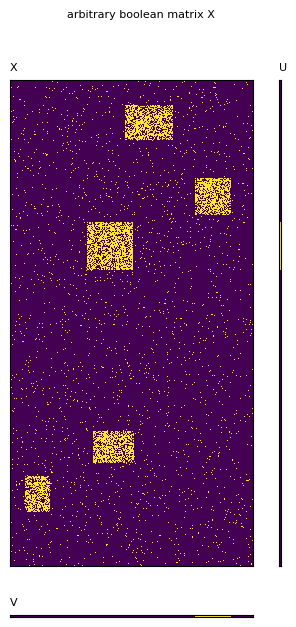

In [2]:
# generate arbitrary Boolean matrix (X)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## I. Reconstruction task

In [3]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)

X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

### 1. Method 'frequency'

[I] k            : 15
[I] rho          : 1
[I] weights      : [1, 1]
[I] method       : frequency
[W] Missing validation data.
[I] verbose      : True
[I] display      : True
[I]   scaling    : 0.5
[I] 0	start		: 28129.0
[I] 	add col		: 28130.0 -> 28030.0 (-100.0)
[I] 	add col		: 28030.0 -> 27982.0 (-48.0)
[I] 	add col		: 27982.0 -> 27977.0 (-5.0)
[I] 	add col		: 27977.0 -> 27970.0 (-7.0)
[I] 0	find_core	: 27970.0 (27970.0)
[I] 	add col c=0	: 27970.0 -> 27968.0
	add row		: 27968.0 -> 27784.0 (-184.0) 104 row(s) added
[I] 	add col c=1	: 27784.0 -> 27766.0
	add row		: 27766.0 -> 27766.0 (0.0) 40 row(s) added
[I] 	add col c=2	: 27766.0 -> 27720.0
[I] 	add col c=3	: 27720.0 -> 27674.0
	add row		: 27674.0 -> 27674.0 (0.0) 8 row(s) added
[I] 	add col c=4	: 27674.0 -> 27634.0
[I] 	add col c=5	: 27634.0 -> 27586.0
	add row		: 27586.0 -> 27586.0 (0.0) 9 row(s) added
[I] 	add col c=6	: 27586.0 -> 27571.0
[I] 	add col c=7	: 27571.0 -> 27532.0
	add row		: 27532.0 -> 27532.0 (0.0) 5 row(s) added
[I

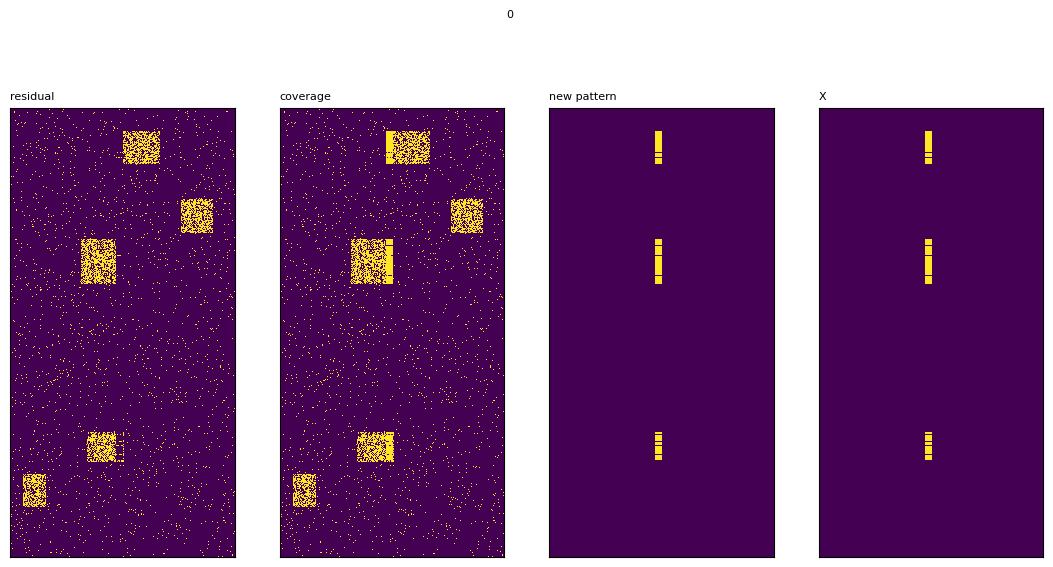

[I] 1	start		: 27460.0
[I] 	add col		: 26206.0 -> 26134.0 (-72.0)
[I] 	add col		: 26134.0 -> 26108.0 (-26.0)
[I] 	add col		: 26108.0 -> 26107.0 (-1.0)
[I] 	add col		: 26107.0 -> 26102.0 (-5.0)
[I] 1	find_core	: 26102.0 (26102.0)
[I] 	add col c=0	: 26102.0 -> 26092.0
	add row		: 26092.0 -> 25949.0 (-143.0) 75 row(s) added
[I] 	add col c=1	: 25949.0 -> 25912.0
	add row		: 25912.0 -> 25912.0 (0.0) 27 row(s) added
[I] 	add col c=2	: 25912.0 -> 25884.0
[I] 	add col c=3	: 25884.0 -> 25850.0
	add row		: 25850.0 -> 25850.0 (0.0) 15 row(s) added
[I] 	add col c=4	: 25850.0 -> 25805.0
[I] 	add col c=5	: 25805.0 -> 25770.0
	add row		: 25770.0 -> 25770.0 (0.0) 6 row(s) added
[I] 	add col c=6	: 25770.0 -> 25727.0
[I] 	add col c=7	: 25727.0 -> 25676.0
	add row		: 25676.0 -> 25676.0 (0.0) 5 row(s) added
[I] 	add col c=8	: 25676.0 -> 25634.0
[I] 	add col c=9	: 25634.0 -> 25596.0
	add row		: 25596.0 -> 25596.0 (0.0) 2 row(s) added
[I] 	add col c=10	: 25596.0 -> 25556.0
[I] 	add col c=11	: 25556.0 -> 255

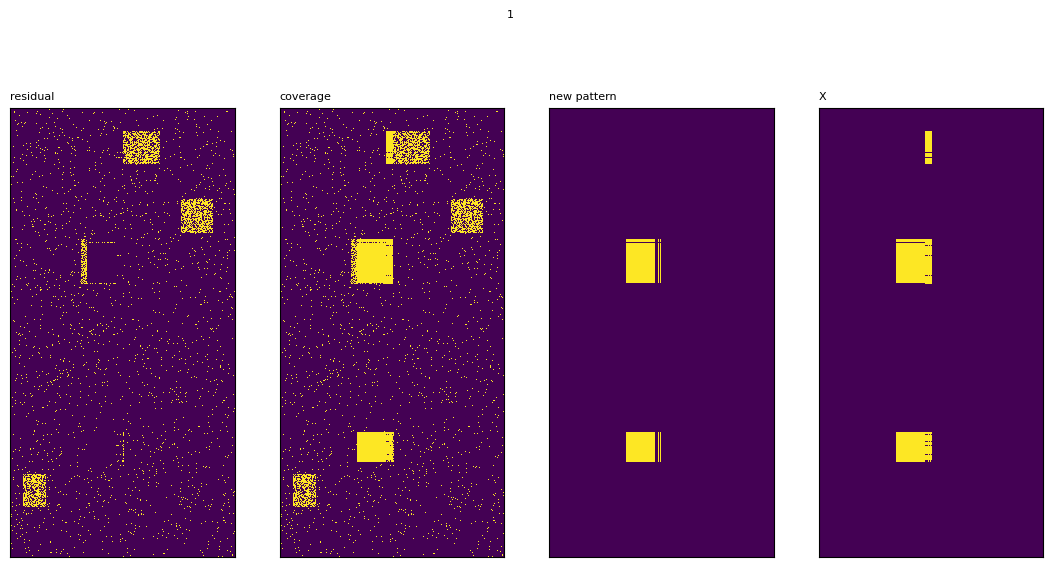

[I] 2	start		: 24176.0
[I] 	add col		: 20038.0 -> 19993.0 (-45.0)
[I] 2	find_core	: 19993.0 (19993.0)
[I] 	add col c=217	: 19993.0 -> 19992.0
	add row		: 19992.0 -> 19992.0 (0.0) 6 row(s) added
[I] 2	extension	: 19992.0 (19992.0)
[I] 	pattern shape	: (52, 3.0)


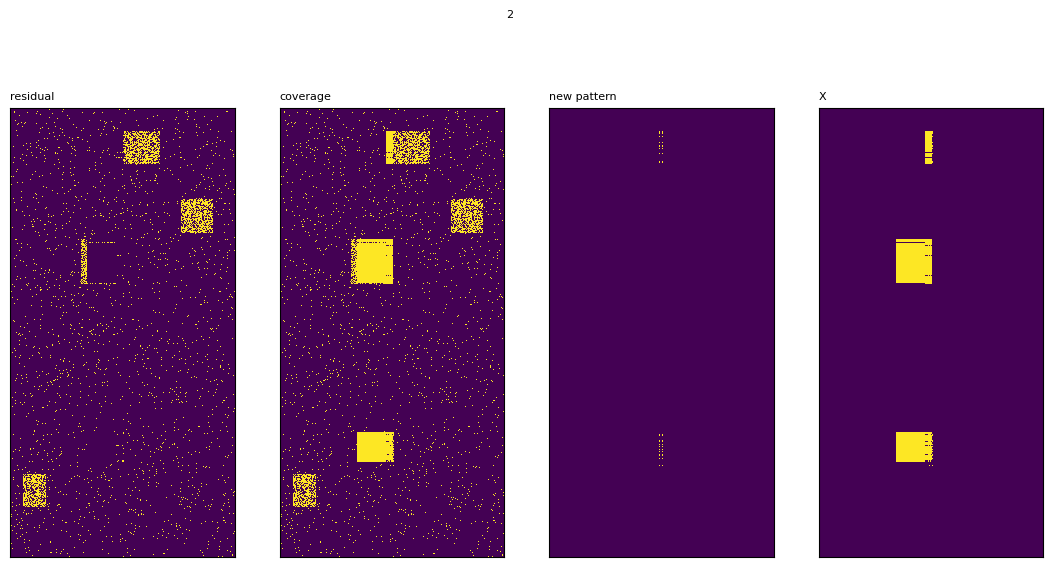

[I] 3	start		: 19992.0
[I] 	add col		: 19987.0 -> 19942.0 (-45.0)
[I] 	add col		: 19942.0 -> 19933.0 (-9.0)
[I] 	add col		: 19933.0 -> 19924.0 (-9.0)
[I] 	add col		: 19924.0 -> 19923.0 (-1.0)
[I] 3	find_core	: 19923.0 (19923.0)
[I] 	add col c=1	: 19923.0 -> 19917.0
	add row		: 19917.0 -> 19835.0 (-82.0) 44 row(s) added
[I] 	add col c=2	: 19835.0 -> 19823.0
	add row		: 19823.0 -> 19823.0 (0.0) 18 row(s) added
[I] 	add col c=3	: 19823.0 -> 19819.0
[I] 	add col c=4	: 19819.0 -> 19797.0
	add row		: 19797.0 -> 19797.0 (0.0) 5 row(s) added
[I] 	add col c=5	: 19797.0 -> 19782.0
[I] 	add col c=10	: 19782.0 -> 19767.0
	add row		: 19767.0 -> 19767.0 (0.0) 5 row(s) added
[I] 	add col c=11	: 19767.0 -> 19755.0
[I] 	add col c=12	: 19755.0 -> 19741.0
	add row		: 19741.0 -> 19741.0 (0.0) 5 row(s) added
[I] 	add col c=228	: 19741.0 -> 19740.0
[I] 	add col c=248	: 19740.0 -> 19739.0
[I] 	add col c=249	: 19739.0 -> 19738.0
[I] 	add col c=250	: 19738.0 -> 19737.0
[I] 	add col c=253	: 19737.0 -> 19736.0
[

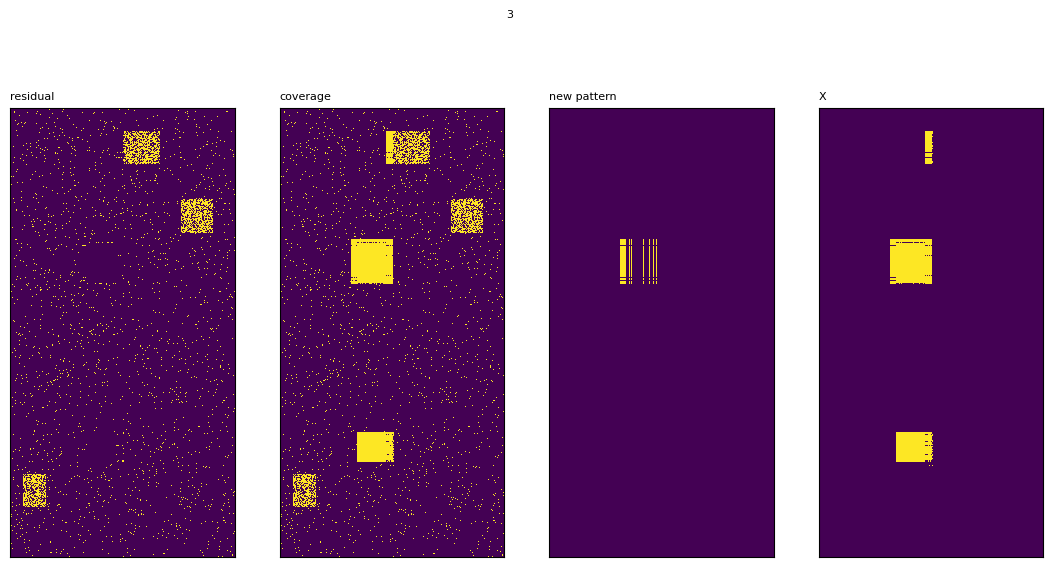

[I] 4	start		: 19726.0
[I] 	add col		: 19290.0 -> 19288.0 (-2.0)
[I] 	add col		: 19288.0 -> 19286.0 (-2.0)
[I] 	add col		: 19286.0 -> 19284.0 (-2.0)
[I] 	add col		: 19284.0 -> 19282.0 (-2.0)
[I] 	add col		: 19282.0 -> 19280.0 (-2.0)
[I] 	add col		: 19280.0 -> 19278.0 (-2.0)
[I] 	add col		: 19278.0 -> 19276.0 (-2.0)
[I] 	add col		: 19276.0 -> 19274.0 (-2.0)
[I] 	add col		: 19274.0 -> 19272.0 (-2.0)
[I] 	add col		: 19272.0 -> 19270.0 (-2.0)
[I] 	add col		: 19270.0 -> 19268.0 (-2.0)
[I] 	add col		: 19268.0 -> 19266.0 (-2.0)
[I] 	add col		: 19266.0 -> 19264.0 (-2.0)
[I] 	add col		: 19264.0 -> 19262.0 (-2.0)
[I] 	add col		: 19262.0 -> 19260.0 (-2.0)
[I] 	add col		: 19260.0 -> 19258.0 (-2.0)
[I] 	add col		: 19258.0 -> 19256.0 (-2.0)
[I] 	add col		: 19256.0 -> 19254.0 (-2.0)
[I] 	add col		: 19254.0 -> 19252.0 (-2.0)
[I] 	add col		: 19252.0 -> 19250.0 (-2.0)
[I] 	add col		: 19250.0 -> 19248.0 (-2.0)
[I] 	add col		: 19248.0 -> 19246.0 (-2.0)
[I] 4	find_core	: 19246.0 (19246.0)
[I] 	add col c=18

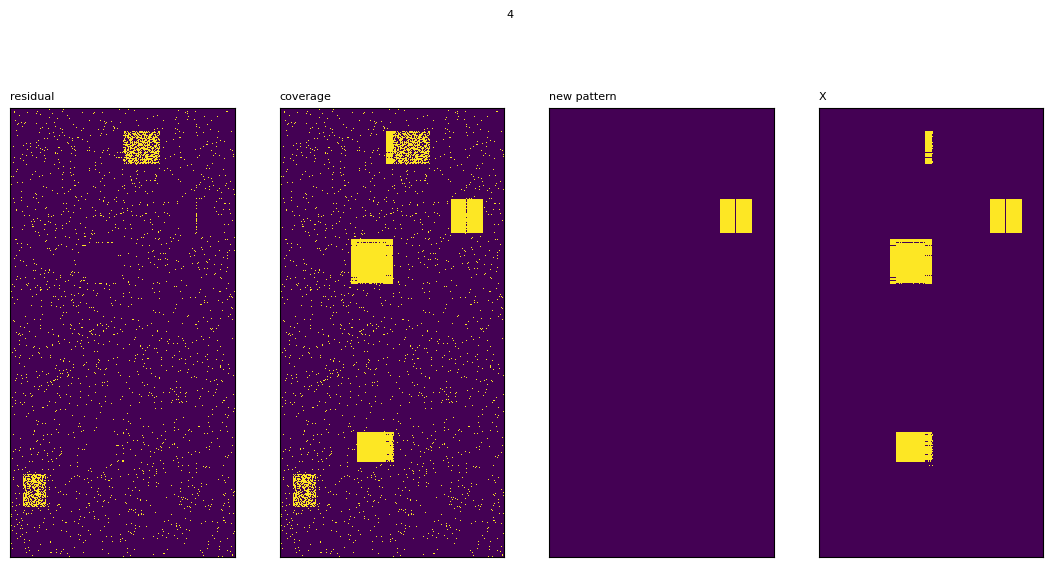

[I] 5	start		: 18419.0
[I] 	add col		: 16268.0 -> 16239.0 (-29.0)
[I] 	add col		: 16239.0 -> 16228.0 (-11.0)
[I] 	add col		: 16228.0 -> 16226.0 (-2.0)
[I] 	add col		: 16226.0 -> 16224.0 (-2.0)
[I] 	add col		: 16224.0 -> 16223.0 (-1.0)
[I] 	add col		: 16223.0 -> 16220.0 (-3.0)
[I] 	add col		: 16220.0 -> 16219.0 (-1.0)
[I] 	add col		: 16219.0 -> 16212.0 (-7.0)
[I] 5	find_core	: 16212.0 (16212.0)
[I] 	add col c=2	: 16212.0 -> 16209.0
	add row		: 16209.0 -> 16097.0 (-112.0) 44 row(s) added
[I] 	add col c=4	: 16097.0 -> 16086.0
	add row		: 16086.0 -> 16086.0 (0.0) 9 row(s) added
[I] 	add col c=9	: 16086.0 -> 16072.0
[I] 	add col c=15	: 16072.0 -> 16052.0
	add row		: 16052.0 -> 16052.0 (0.0) 7 row(s) added
[I] 	add col c=25	: 16052.0 -> 16033.0
[I] 	add col c=27	: 16033.0 -> 16014.0
	add row		: 16014.0 -> 16014.0 (0.0) 3 row(s) added
[I] 	add col c=28	: 16014.0 -> 16000.0
[I] 	add col c=29	: 16000.0 -> 15982.0
[I] 	add col c=32	: 15982.0 -> 15968.0
[I] 	add col c=37	: 15968.0 -> 15960.0
	add

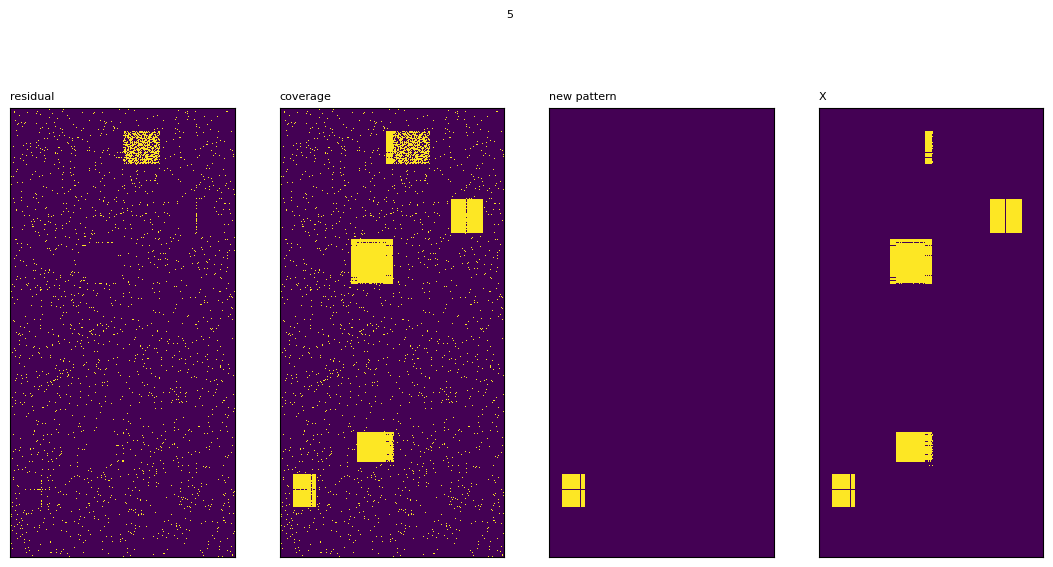

[I] 6	start		: 15562.0
[I] 	add col		: 14152.0 -> 14121.0 (-31.0)
[I] 	add col		: 14121.0 -> 14108.0 (-13.0)
[I] 	add col		: 14108.0 -> 14101.0 (-7.0)
[I] 	add col		: 14101.0 -> 14096.0 (-5.0)
[I] 	add col		: 14096.0 -> 14092.0 (-4.0)
[I] 6	find_core	: 14092.0 (14092.0)
[I] 	add col c=0	: 14092.0 -> 14092.0
	add row		: 14092.0 -> 14002.0 (-90.0) 49 row(s) added
[I] 	add col c=1	: 14002.0 -> 13995.0
[I] 	add col c=3	: 13995.0 -> 13982.0
	add row		: 13982.0 -> 13982.0 (0.0) 2 row(s) added
[I] 	add col c=4	: 13982.0 -> 13963.0
[I] 	add col c=6	: 13963.0 -> 13946.0
	add row		: 13946.0 -> 13946.0 (0.0) 2 row(s) added
[I] 	add col c=7	: 13946.0 -> 13927.0
[I] 	add col c=8	: 13927.0 -> 13910.0
	add row		: 13910.0 -> 13910.0 (0.0) 2 row(s) added
[I] 	add col c=9	: 13910.0 -> 13897.0
[I] 	add col c=10	: 13897.0 -> 13878.0
[I] 	add col c=11	: 13878.0 -> 13855.0
[I] 	add col c=12	: 13855.0 -> 13836.0
	add row		: 13836.0 -> 13836.0 (0.0) 2 row(s) added
[I] 	add col c=13	: 13836.0 -> 13817.0
[I] 	a

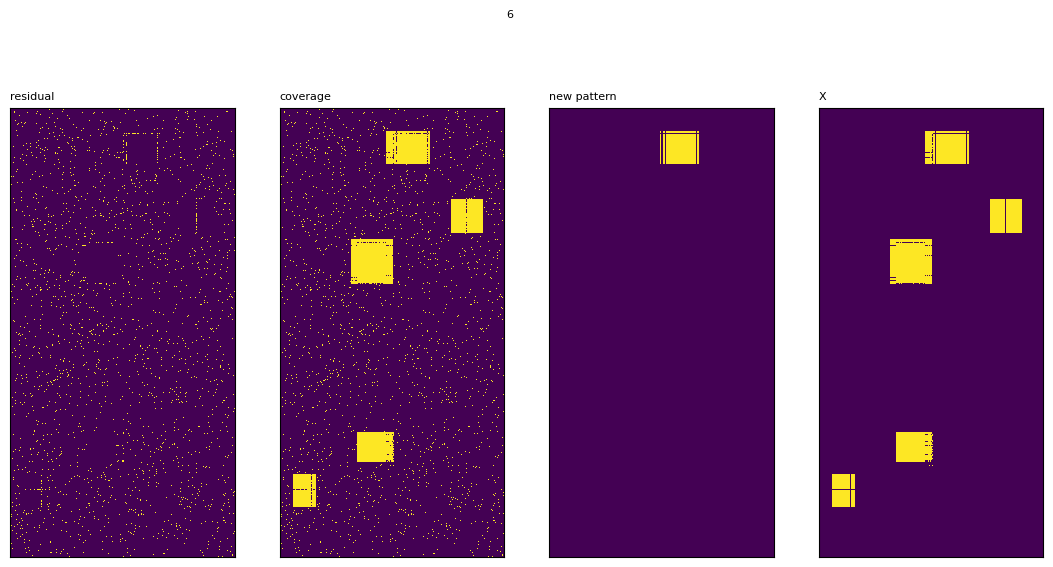

[I] 7	start		: 13127.0
[I] 	add col		: 11039.0 -> 11005.0 (-34.0)
[I] 7	find_core	: 11005.0 (11005.0)
[I] 7	extension	: 11005.0 (11005.0)
[I] 	pattern shape	: (35, 2.0)


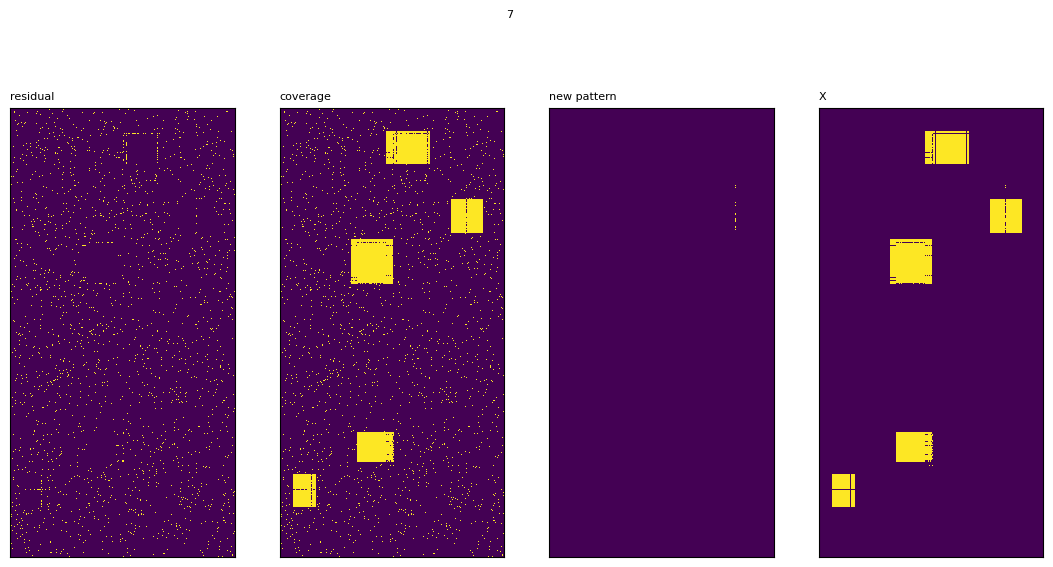

[I] 8	start		: 11005.0
[I] 	add col		: 11006.0 -> 11003.0 (-3.0)
[I] 8	find_core	: 11003.0 (11003.0)
[I] 	add col c=176	: 11003.0 -> 11003.0
	add row		: 11003.0 -> 11003.0 (0.0) 3 row(s) added
[I] 8	extension	: 11003.0 (11003.0)
[I] 	pattern shape	: (7, 3.0)


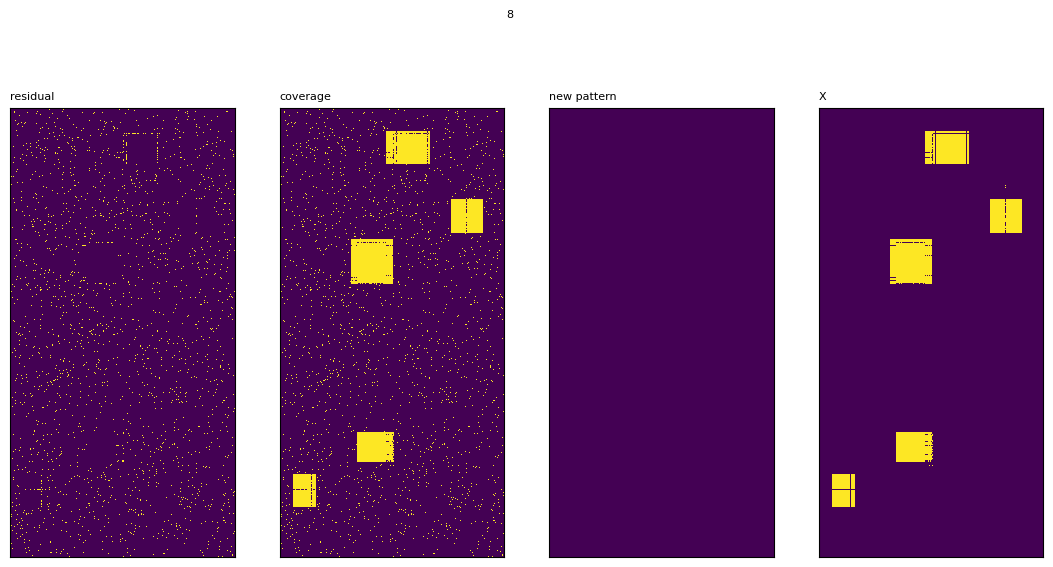

[I] 9	start		: 11003.0
[I] 	add col		: 11001.0 -> 10999.0 (-2.0)
[I] 9	find_core	: 10999.0 (10999.0)
[I] 9	extension	: 10999.0 (10999.0)
[I] 	pattern shape	: (3, 2.0)


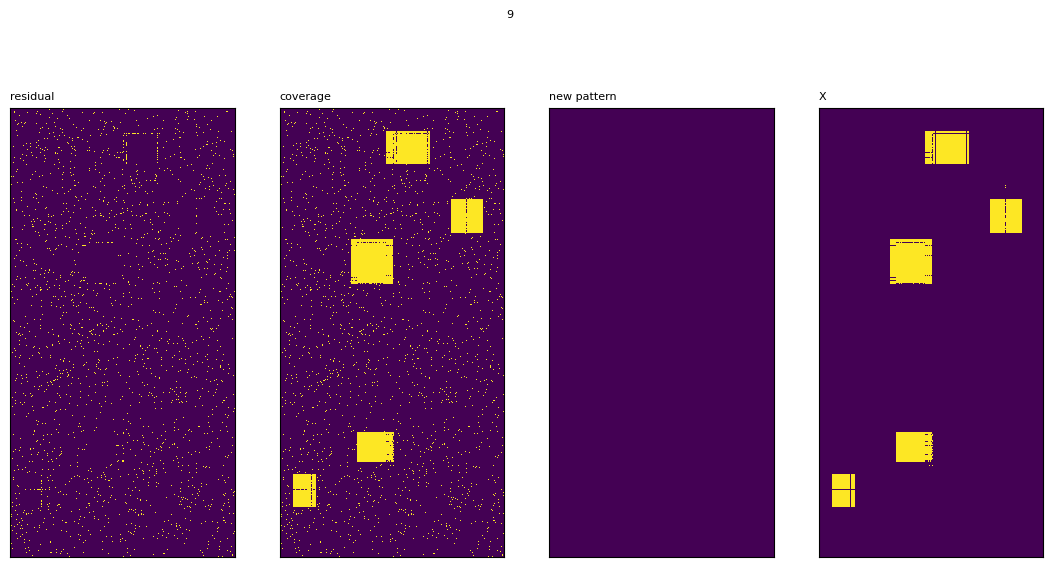

[I] 10	start		: 10999.0
[I] 	add col		: 11000.0 -> 10982.0 (-18.0)
[I] 	add col		: 10982.0 -> 10976.0 (-6.0)
[I] 10	find_core	: 10976.0 (10976.0)
[I] 	add col c=11	: 10976.0 -> 10976.0
	add row		: 10976.0 -> 10975.0 (-1.0) 19 row(s) added
[I] 	add col c=58	: 10975.0 -> 10975.0
[I] 	add col c=61	: 10975.0 -> 10975.0
[I] 	add col c=81	: 10975.0 -> 10975.0
[I] 	add col c=87	: 10975.0 -> 10975.0
[I] 	add col c=88	: 10975.0 -> 10975.0
[I] 	add col c=100	: 10975.0 -> 10975.0
[I] 	add col c=123	: 10975.0 -> 10975.0
[I] 	add col c=152	: 10975.0 -> 10975.0
[I] 	add col c=160	: 10975.0 -> 10975.0
[I] 	add col c=179	: 10975.0 -> 10975.0
[I] 	add col c=182	: 10975.0 -> 10975.0
[I] 	add col c=183	: 10975.0 -> 10975.0
[I] 	add col c=184	: 10975.0 -> 10975.0
[I] 	add col c=190	: 10975.0 -> 10975.0
[I] 	add col c=248	: 10975.0 -> 10975.0
[I] 	add col c=273	: 10975.0 -> 10975.0
[I] 	add col c=298	: 10975.0 -> 10975.0
[I] 	add col c=300	: 10975.0 -> 10975.0
[I] 	add col c=348	: 10975.0 -> 10975.0
[I] 	a

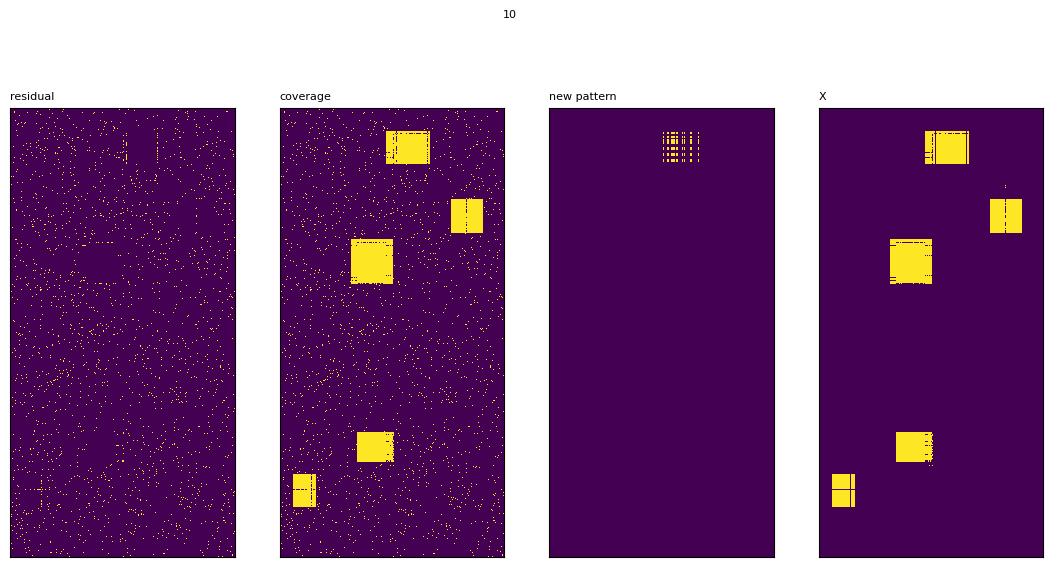

[I] 11	start		: 10975.0
[I] 	add col		: 10958.0 -> 10957.0 (-1.0)
[I] 11	find_core	: 10957.0 (10957.0)
[I] 11	extension	: 10957.0 (10957.0)
[I] 	pattern shape	: (2, 2.0)


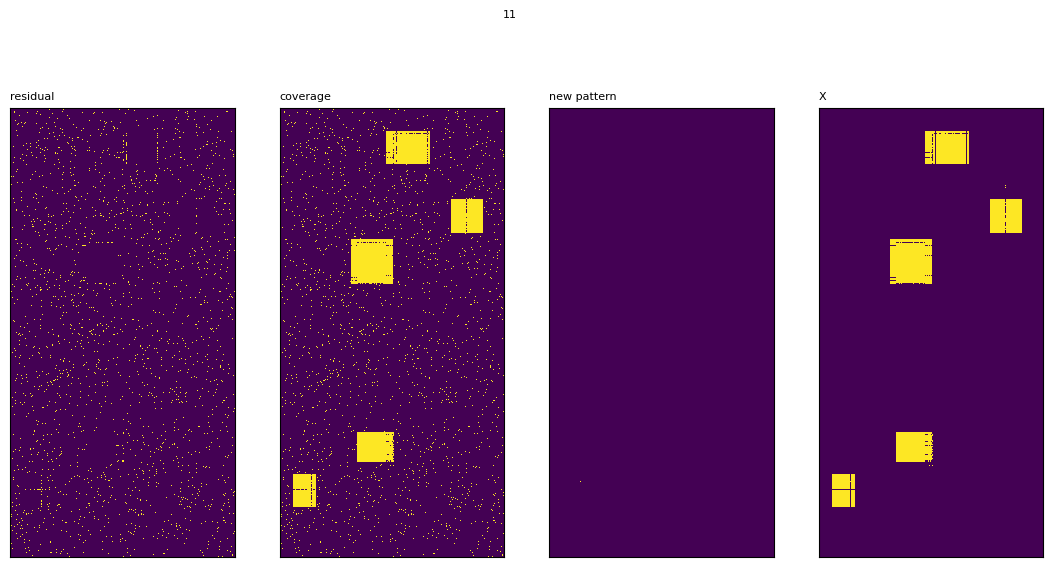

[I] 12	start		: 10957.0
[I] 	add col		: 10958.0 -> 10943.0 (-15.0)
[I] 12	find_core	: 10943.0 (10943.0)
[I] 12	extension	: 10943.0 (10943.0)
[I] 	pattern shape	: (16, 2.0)


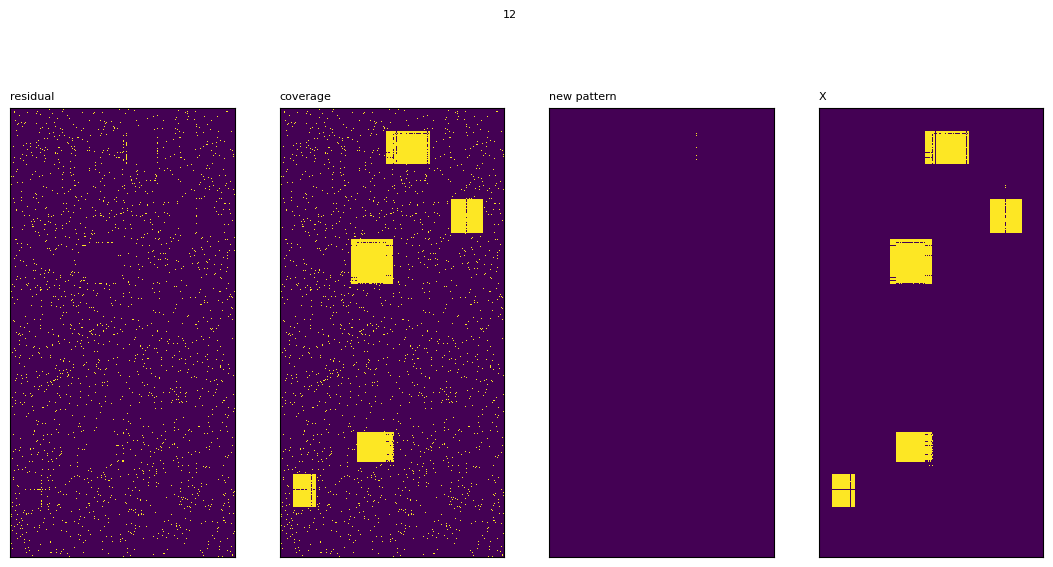

[I] 13	start		: 10943.0
[I] 	add col		: 10944.0 -> 10941.0 (-3.0)
[I] 13	find_core	: 10941.0 (10941.0)
[I] 13	extension	: 10941.0 (10941.0)
[I] 	pattern shape	: (4, 2.0)


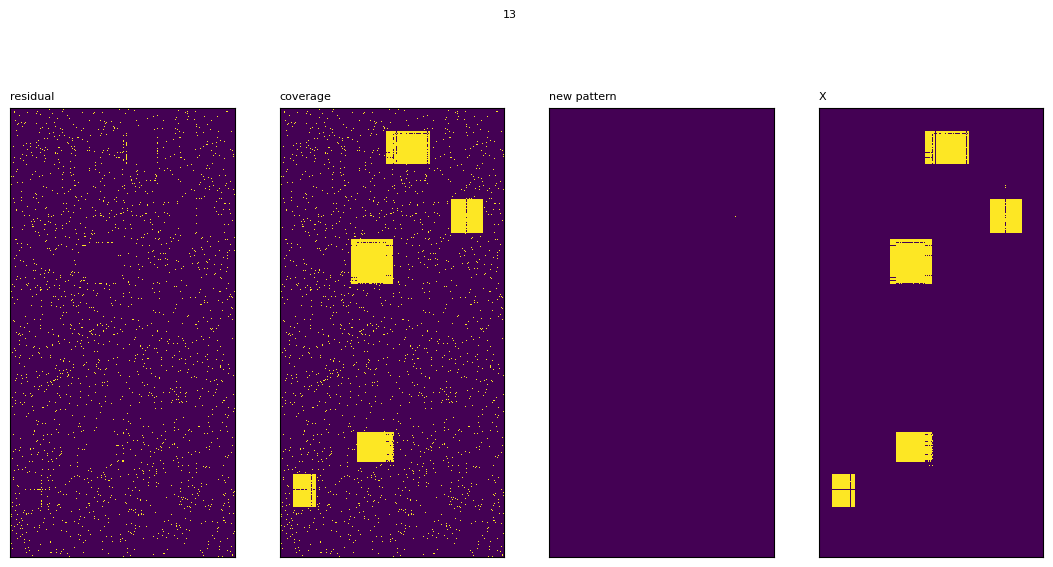

[I] 14	start		: 10941.0
[I] 	add col		: 10942.0 -> 10938.0 (-4.0)
[I] 14	find_core	: 10938.0 (10938.0)
[I] 14	extension	: 10938.0 (10938.0)
[I] 	pattern shape	: (5, 2.0)


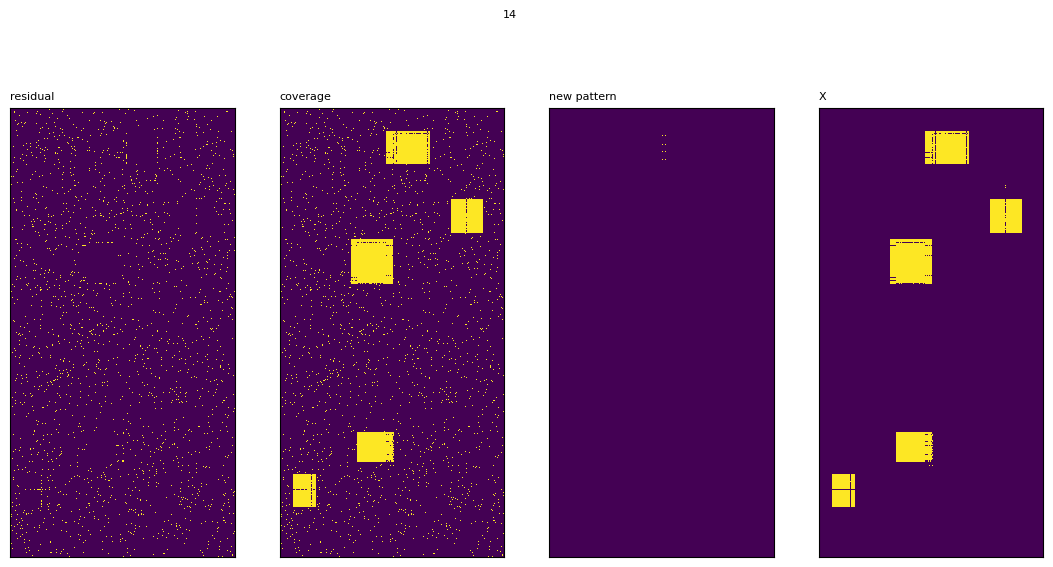

In [9]:
k = 15
rho = 1
w = [1, 1]

panda = Panda(k=k, rho=rho, w=w)
panda.fit(X_train, display=True, scaling=0.5, verbose=True)

# from utils import matmul, to_dense, show_matrix
# settings = [(to_dense(X_test), [0, 0], 'X'), 
#             (matmul(panda.U, panda.V.T, sparse=False, boolean=True), [0, 1], "X'")]
# show_matrix(settings=settings, scaling=0.5)

### 2. Method 'couples-frequency'

[I] k            : 15
[I] rho          : 1.0
[I] weights      : [1, 1]
[I] method       : frequency
[W] Missing validation data.
[I] verbose      : True
[I] display      : True
[I]   scaling    : 0.5
[I] method       : couples-frequency
[I] 0	init cost	: 28129.0
[I] 	add col		: 28130.0 -> 28030.0 (-100.0)
[I] 	add col		: 28030.0 -> 27982.0 (-48.0)
[I] 	add col		: 27982.0 -> 27962.0 (-20.0)
[I] 0	find core	: 27962.0 (27962.0)
[I] 	add col c=0	: 27962.0 -> 27938.0
[I] 	add row		: 27938.0 -> 27858.0 (-80.0) 120 row(s) added
[I] 	add col c=1	: 27858.0 -> 27816.0
[I] 	add col c=2	: 27816.0 -> 27772.0
[I] 	add row		: 27772.0 -> 27772.0 (0.0) 16 row(s) added
[I] 	add col c=3	: 27772.0 -> 27734.0
[I] 	add col c=4	: 27734.0 -> 27690.0
[I] 	add row		: 27690.0 -> 27690.0 (0.0) 10 row(s) added
[I] 	add col c=5	: 27690.0 -> 27646.0
[I] 	add col c=6	: 27646.0 -> 27606.0
[I] 	add row		: 27606.0 -> 27606.0 (0.0) 10 row(s) added
[I] 	add col c=7	: 27606.0 -> 27568.0
[I] 	add col c=8	: 27568.0 -> 27552.

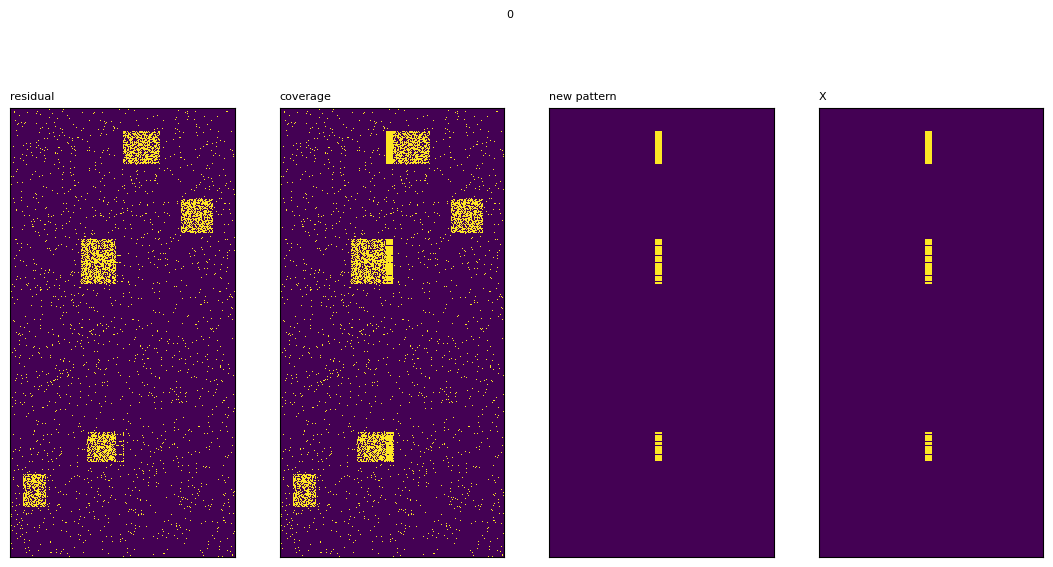

[I] 1	init cost	: 27478.0
[I] 	add col		: 26170.0 -> 26094.0 (-76.0)
[I] 	add col		: 26094.0 -> 26072.0 (-22.0)
[I] 	add col		: 26072.0 -> 26068.0 (-4.0)
[I] 	add col		: 26068.0 -> 26066.0 (-2.0)
[I] 	add col		: 26066.0 -> 26065.0 (-1.0)
[I] 1	find core	: 26065.0 (26065.0)
[I] 	add col c=0	: 26065.0 -> 26062.0
[I] 	add row		: 26062.0 -> 25880.0 (-182.0) 111 row(s) added
[I] 	add col c=1	: 25880.0 -> 25842.0
[I] 	add col c=2	: 25842.0 -> 25800.0
[I] 	add row		: 25800.0 -> 25800.0 (0.0) 14 row(s) added
[I] 	add col c=3	: 25800.0 -> 25758.0
[I] 	add col c=4	: 25758.0 -> 25712.0
[I] 	add row		: 25712.0 -> 25712.0 (0.0) 5 row(s) added
[I] 	add col c=5	: 25712.0 -> 25665.0
[I] 	add col c=6	: 25665.0 -> 25618.0
[I] 	add row		: 25618.0 -> 25618.0 (0.0) 2 row(s) added
[I] 	add col c=7	: 25618.0 -> 25577.0
[I] 	add col c=8	: 25577.0 -> 25540.0
[I] 	add row		: 25540.0 -> 25540.0 (0.0) 2 row(s) added
[I] 	add col c=9	: 25540.0 -> 25497.0
[I] 	add col c=10	: 25497.0 -> 25458.0
[I] 	add row		: 25458

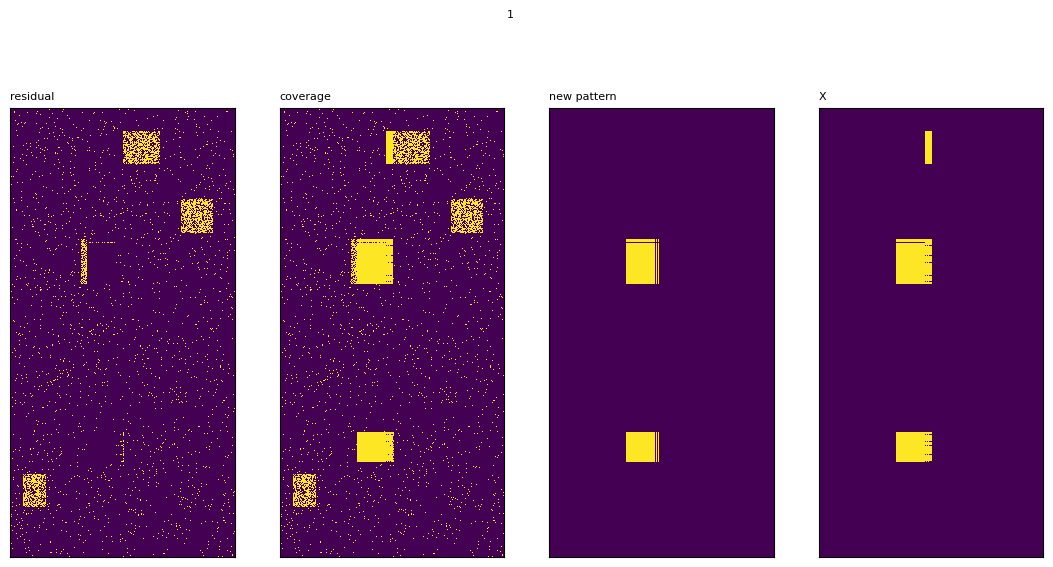

[I] 2	init cost	: 24145.0
[I] 	add col		: 20059.0 -> 20055.0 (-4.0)
[I] 	add col		: 20055.0 -> 20055.0 (0.0)
[I] 	add col		: 20055.0 -> 20053.0 (-2.0)
[I] 	add col		: 20053.0 -> 20051.0 (-2.0)
[I] 	add col		: 20051.0 -> 20049.0 (-2.0)
[I] 	add col		: 20049.0 -> 20047.0 (-2.0)
[I] 	add col		: 20047.0 -> 20045.0 (-2.0)
[I] 	add col		: 20045.0 -> 20043.0 (-2.0)
[I] 	add col		: 20043.0 -> 20041.0 (-2.0)
[I] 	add col		: 20041.0 -> 20039.0 (-2.0)
[I] 	add col		: 20039.0 -> 20037.0 (-2.0)
[I] 	add col		: 20037.0 -> 20035.0 (-2.0)
[I] 	add col		: 20035.0 -> 20033.0 (-2.0)
[I] 	add col		: 20033.0 -> 20031.0 (-2.0)
[I] 	add col		: 20031.0 -> 20029.0 (-2.0)
[I] 	add col		: 20029.0 -> 20027.0 (-2.0)
[I] 	add col		: 20027.0 -> 20025.0 (-2.0)
[I] 	add col		: 20025.0 -> 20023.0 (-2.0)
[I] 	add col		: 20023.0 -> 20021.0 (-2.0)
[I] 	add col		: 20021.0 -> 20019.0 (-2.0)
[I] 	add col		: 20019.0 -> 20017.0 (-2.0)
[I] 	add col		: 20017.0 -> 20015.0 (-2.0)
[I] 2	find core	: 20015.0 (20015.0)
[I] 	add col c=

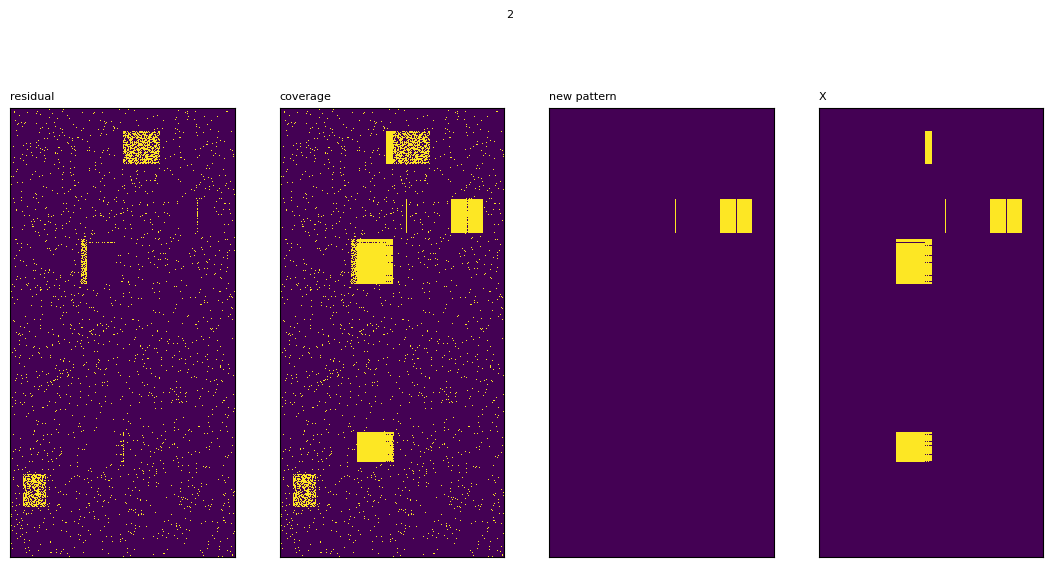

[I] 3	init cost	: 19141.0
[I] 	add col		: 17011.0 -> 16978.0 (-33.0)
[I] 	add col		: 16978.0 -> 16963.0 (-15.0)
[I] 	add col		: 16963.0 -> 16960.0 (-3.0)
[I] 	add col		: 16960.0 -> 16955.0 (-5.0)
[I] 	add col		: 16955.0 -> 16946.0 (-9.0)
[I] 	add col		: 16946.0 -> 16945.0 (-1.0)
[I] 3	find core	: 16945.0 (16945.0)
[I] 	add col c=0	: 16945.0 -> 16940.0
[I] 	add row		: 16940.0 -> 16832.0 (-108.0) 42 row(s) added
[I] 	add col c=1	: 16832.0 -> 16807.0
[I] 	add row		: 16807.0 -> 16807.0 (0.0) 9 row(s) added
[I] 	add col c=2	: 16807.0 -> 16785.0
[I] 	add col c=3	: 16785.0 -> 16765.0
[I] 	add row		: 16765.0 -> 16765.0 (0.0) 1 row(s) added
[I] 	add col c=4	: 16765.0 -> 16748.0
[I] 	add col c=5	: 16748.0 -> 16741.0
[I] 	add row		: 16741.0 -> 16741.0 (0.0) 2 row(s) added
[I] 	add col c=6	: 16741.0 -> 16726.0
[I] 	add col c=7	: 16726.0 -> 16703.0
[I] 	add row		: 16703.0 -> 16703.0 (0.0) 4 row(s) added
[I] 	add col c=8	: 16703.0 -> 16680.0
[I] 	add col c=9	: 16680.0 -> 16659.0
[I] 	add row		: 1665

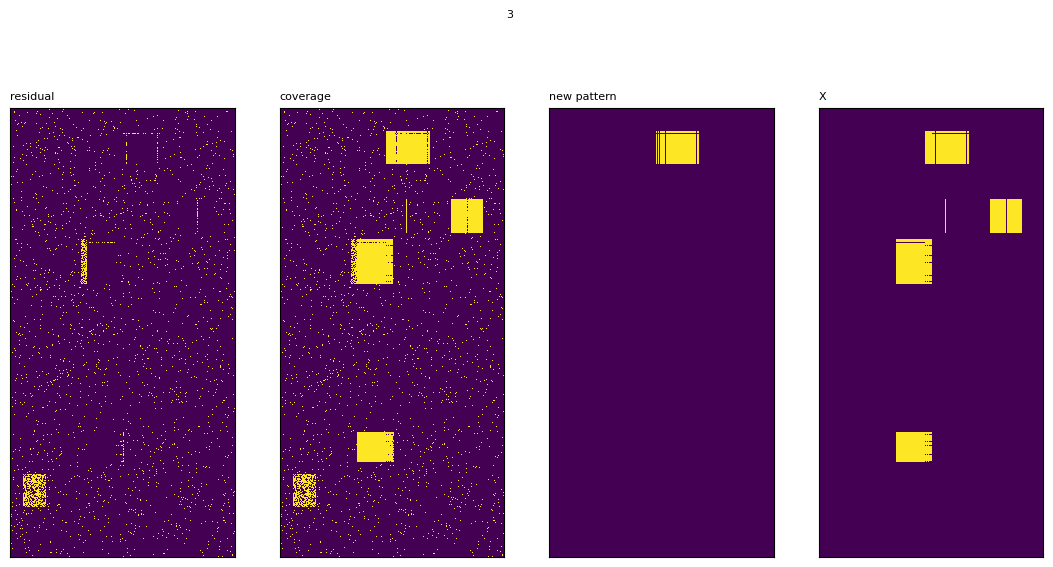

[I] 4	init cost	: 15976.0
[I] 	add col		: 13824.0 -> 13788.0 (-36.0)
[I] 	add col		: 13788.0 -> 13780.0 (-8.0)
[I] 	add col		: 13780.0 -> 13776.0 (-4.0)
[I] 	add col		: 13776.0 -> 13776.0 (0.0)
[I] 	add col		: 13776.0 -> 13774.0 (-2.0)
[I] 	add col		: 13774.0 -> 13770.0 (-4.0)
[I] 	add col		: 13770.0 -> 13761.0 (-9.0)
[I] 	add col		: 13761.0 -> 13760.0 (-1.0)
[I] 4	find core	: 13760.0 (13760.0)
[I] 	add col c=0	: 13760.0 -> 13760.0
[I] 	add row		: 13760.0 -> 13630.0 (-130.0) 48 row(s) added
[I] 	add col c=1	: 13630.0 -> 13610.0
[I] 	add row		: 13610.0 -> 13610.0 (0.0) 8 row(s) added
[I] 	add col c=2	: 13610.0 -> 13594.0
[I] 	add col c=3	: 13594.0 -> 13574.0
[I] 	add row		: 13574.0 -> 13574.0 (0.0) 2 row(s) added
[I] 	add col c=4	: 13574.0 -> 13562.0
[I] 	add col c=5	: 13562.0 -> 13542.0
[I] 	add row		: 13542.0 -> 13542.0 (0.0) 1 row(s) added
[I] 	add col c=6	: 13542.0 -> 13517.0
[I] 	add col c=7	: 13517.0 -> 13500.0
[I] 	add row		: 13500.0 -> 13500.0 (0.0) 2 row(s) added
[I] 	add col c

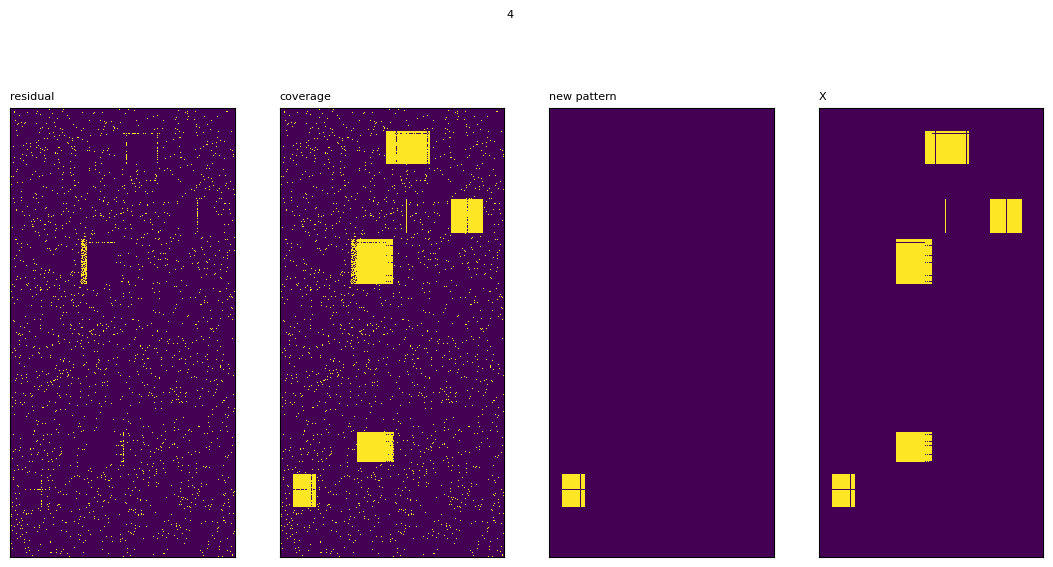

[I] 5	init cost	: 13118.0
[I] 	add col		: 11708.0 -> 11678.0 (-30.0)
[I] 	add col		: 11678.0 -> 11674.0 (-4.0)
[I] 	add col		: 11674.0 -> 11669.0 (-5.0)
[I] 	add col		: 11669.0 -> 11668.0 (-1.0)
[I] 	add col		: 11668.0 -> 11668.0 (0.0)
[I] 	add col		: 11668.0 -> 11666.0 (-2.0)
[I] 5	find core	: 11666.0 (11666.0)
[I] 	add col c=0	: 11666.0 -> 11663.0
[I] 	add row		: 11663.0 -> 11542.0 (-121.0) 55 row(s) added
[I] 	add col c=1	: 11542.0 -> 11516.0
[I] 	add row		: 11516.0 -> 11516.0 (0.0) 13 row(s) added
[I] 	add col c=2	: 11516.0 -> 11499.0
[I] 	add col c=3	: 11499.0 -> 11484.0
[I] 	add row		: 11484.0 -> 11484.0 (0.0) 4 row(s) added
[I] 	add col c=4	: 11484.0 -> 11483.0
[I] 	add col c=5	: 11483.0 -> 11478.0
[I] 	add row		: 11478.0 -> 11478.0 (0.0) 11 row(s) added
[I] 	add col c=6	: 11478.0 -> 11464.0
[I] 5	extension	: 11464.0 (11464.0)
[I] 	pattern shape	: (91, 14.0)


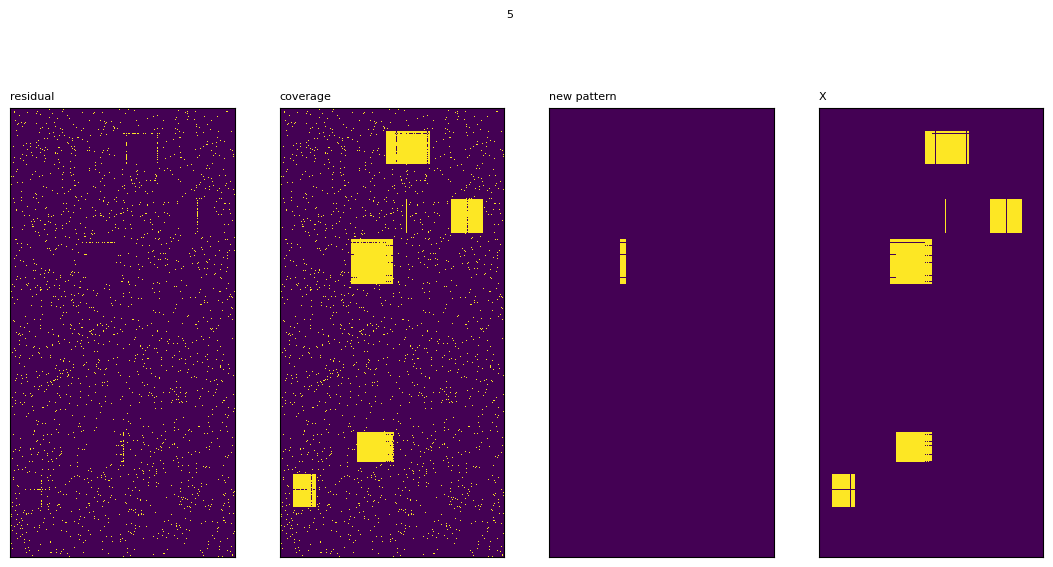

[I] 6	init cost	: 11464.0
[I] 	add col		: 11002.0 -> 10981.0 (-21.0)
[I] 6	find core	: 10981.0 (10981.0)
[I] 	add col c=18	: 10981.0 -> 10980.0
[I] 	add row		: 10980.0 -> 10980.0 (0.0) 4 row(s) added
[I] 6	extension	: 10980.0 (10980.0)
[I] 	pattern shape	: (26, 3.0)


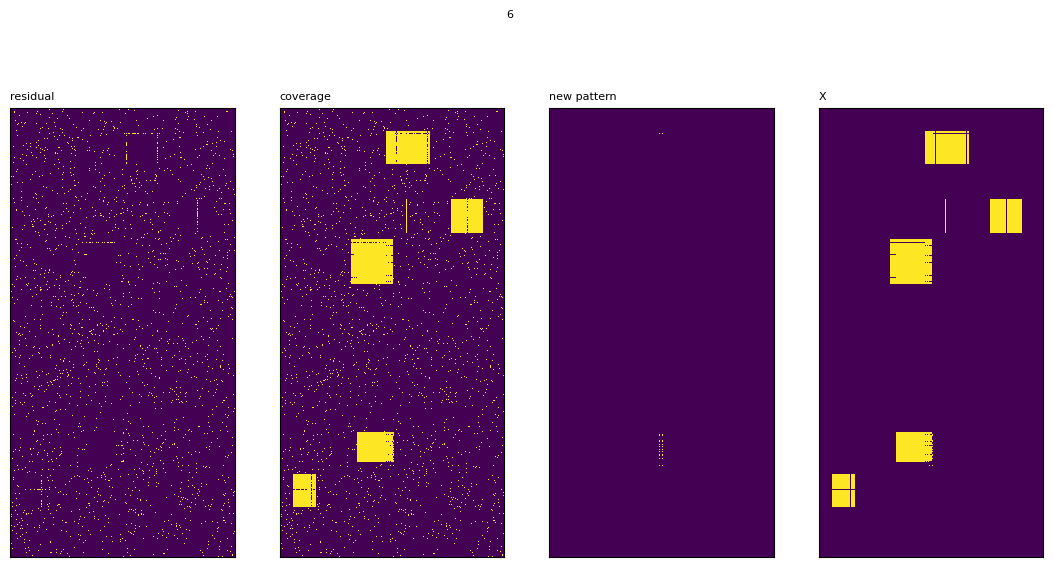

[I] 7	init cost	: 10980.0
[I] 	add col		: 10978.0 -> 10975.0 (-3.0)
[I] 7	find core	: 10975.0 (10975.0)
[I] 	add col c=29	: 10975.0 -> 10975.0
[I] 	add row		: 10975.0 -> 10975.0 (0.0) 4 row(s) added
[I] 7	extension	: 10975.0 (10975.0)
[I] 	pattern shape	: (8, 3.0)


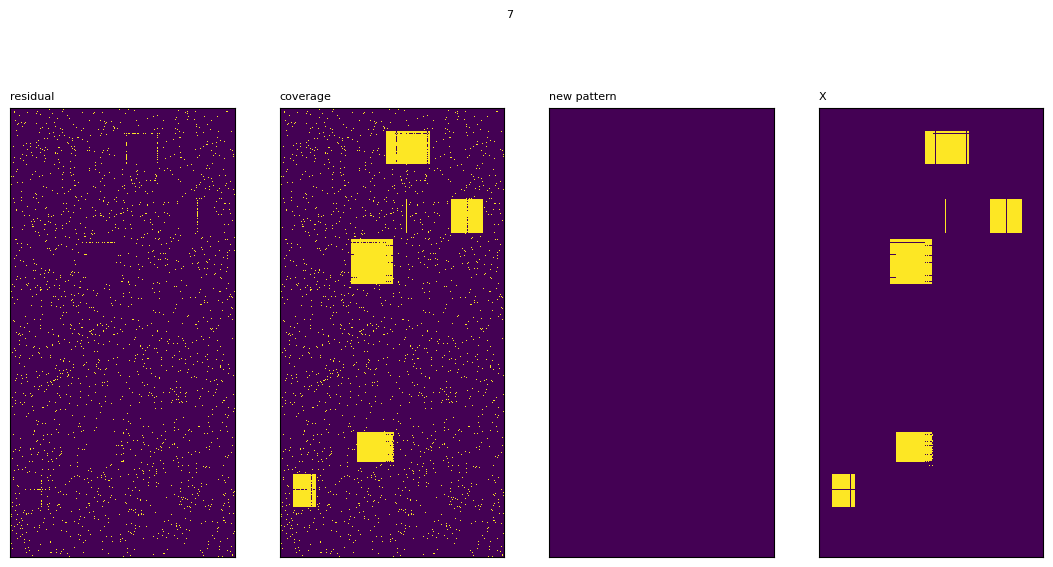

[I] 8	init cost	: 10975.0
[I] 	add col		: 10972.0 -> 10970.0 (-2.0)
[I] 	add col		: 10970.0 -> 10968.0 (-2.0)
[I] 8	find core	: 10968.0 (10968.0)
[I] 	add col c=88	: 10968.0 -> 10968.0
[I] 8	extension	: 10968.0 (10968.0)
[I] 	pattern shape	: (3, 4.0)


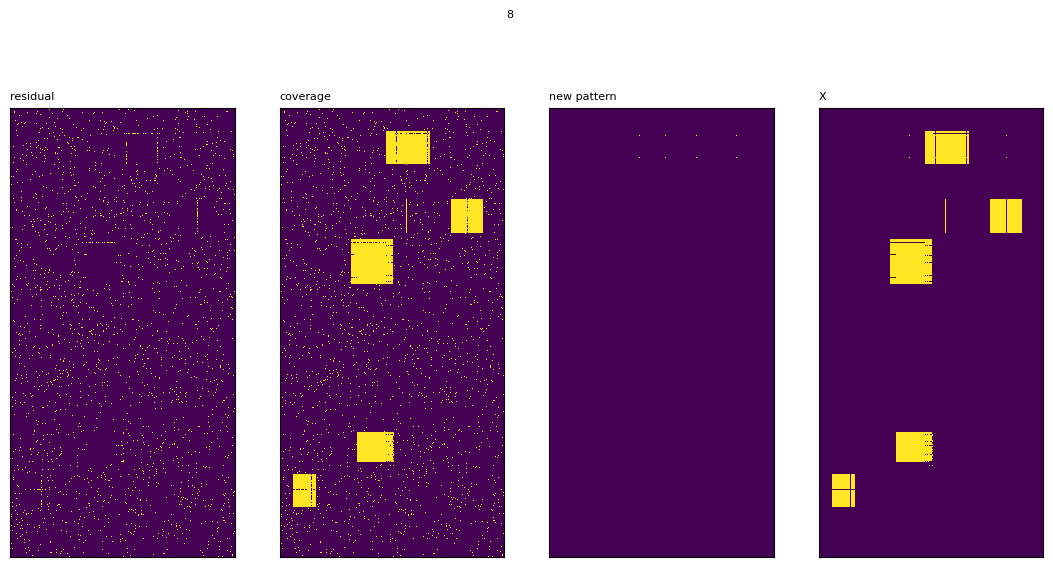

[I] 9	init cost	: 10968.0
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 	add col		: 10968.0 -> 10968.0 (0.0)
[I] 9	find core	: 10968.0 (10968.0)
[I] 9	extension	: 10968.0 (10968.0)
[I] 	pattern shape	: (1, 11.0)


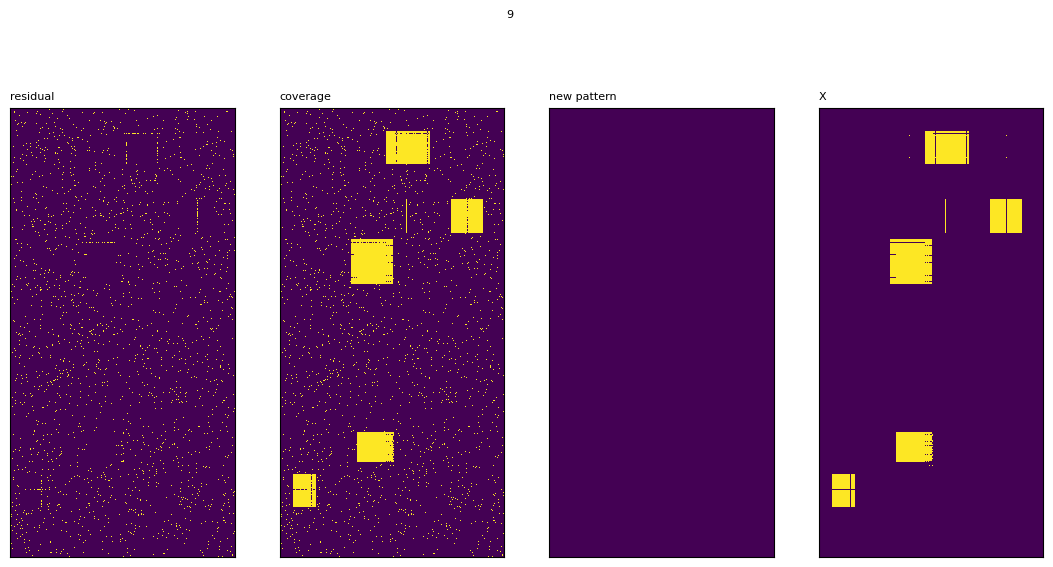

[I] 10	init cost	: 10968.0
[I] 	add col		: 10969.0 -> 10968.0 (-1.0)
[I] 10	find core	: 10968.0 (10968.0)
[I] 10	extension	: 10968.0 (10968.0)
[I] 	pattern shape	: (2, 2.0)


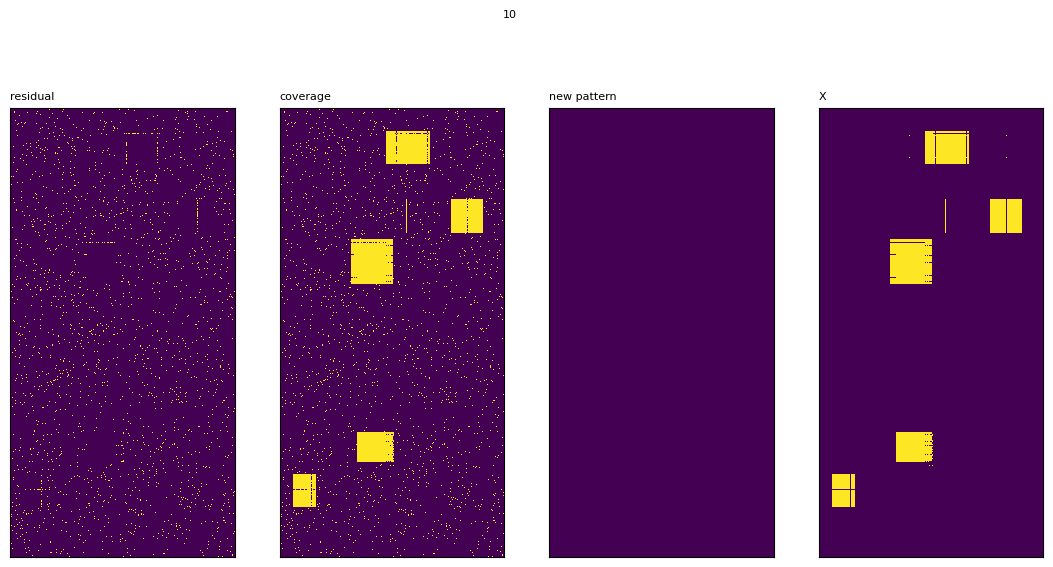

[I] 11	init cost	: 10968.0
[I] 	add col		: 10969.0 -> 10968.0 (-1.0)
[I] 11	find core	: 10968.0 (10968.0)
[I] 	add col c=238	: 10968.0 -> 10968.0
[I] 	add row		: 10968.0 -> 10968.0 (0.0) 2 row(s) added
[I] 	add col c=276	: 10968.0 -> 10968.0
[I] 11	extension	: 10968.0 (10968.0)
[I] 	pattern shape	: (4, 4.0)


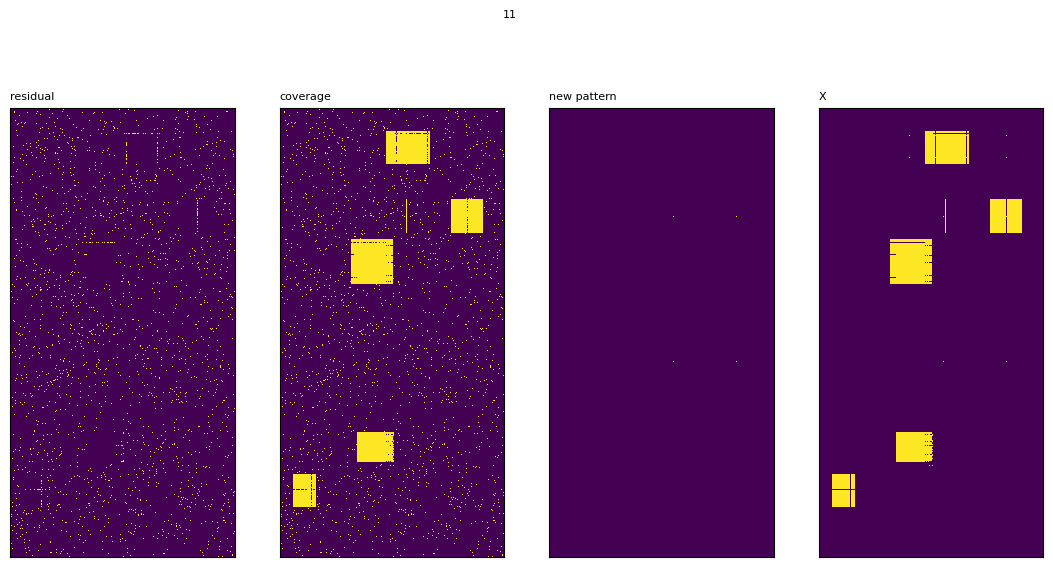

[I] 12	init cost	: 10968.0
[I] 	add col		: 10966.0 -> 10963.0 (-3.0)
[I] 12	find core	: 10963.0 (10963.0)
[I] 	add col c=48	: 10963.0 -> 10963.0
[I] 	add row		: 10963.0 -> 10963.0 (0.0) 6 row(s) added
[I] 12	extension	: 10963.0 (10963.0)
[I] 	pattern shape	: (10, 3.0)


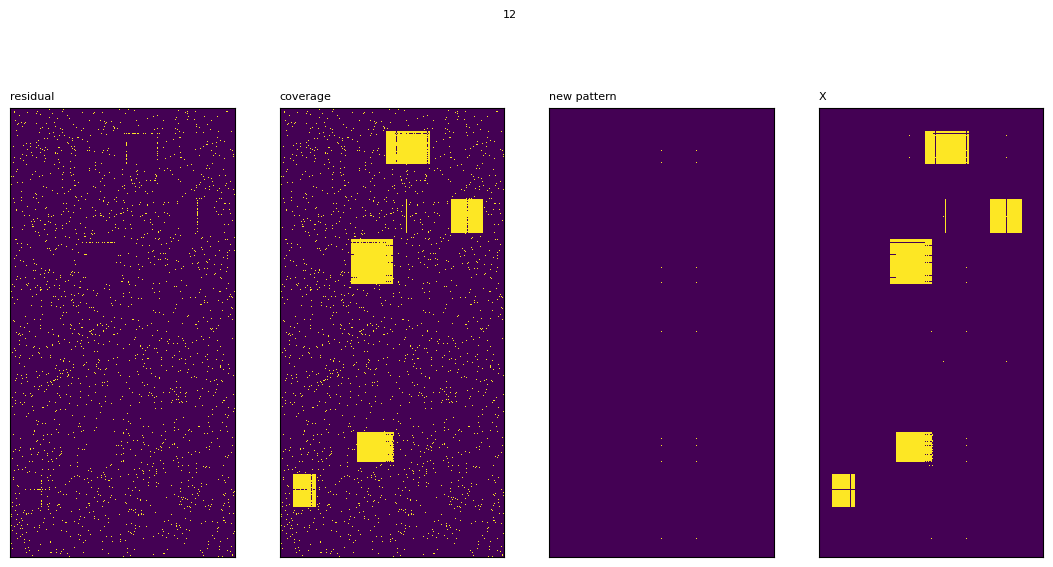

[I] 13	init cost	: 10963.0
[I] 	add col		: 10960.0 -> 10942.0 (-18.0)
[I] 	add col		: 10942.0 -> 10936.0 (-6.0)
[I] 13	find core	: 10936.0 (10936.0)
[I] 	add col c=8	: 10936.0 -> 10936.0
[I] 	add row		: 10936.0 -> 10935.0 (-1.0) 19 row(s) added
[I] 	add col c=21	: 10935.0 -> 10935.0
[I] 	add col c=30	: 10935.0 -> 10935.0
[I] 	add col c=42	: 10935.0 -> 10935.0
[I] 	add col c=45	: 10935.0 -> 10935.0
[I] 	add col c=46	: 10935.0 -> 10935.0
[I] 	add col c=52	: 10935.0 -> 10935.0
[I] 	add col c=81	: 10935.0 -> 10935.0
[I] 	add col c=89	: 10935.0 -> 10935.0
[I] 	add col c=109	: 10935.0 -> 10935.0
[I] 	add col c=138	: 10935.0 -> 10935.0
[I] 	add col c=157	: 10935.0 -> 10935.0
[I] 	add col c=158	: 10935.0 -> 10935.0
[I] 	add col c=160	: 10935.0 -> 10935.0
[I] 	add col c=173	: 10935.0 -> 10935.0
[I] 	add col c=179	: 10935.0 -> 10935.0
[I] 	add col c=186	: 10935.0 -> 10935.0
[I] 	add col c=188	: 10935.0 -> 10935.0
[I] 	add col c=203	: 10935.0 -> 10935.0
[I] 	add col c=250	: 10935.0 -> 10935.0
[I]

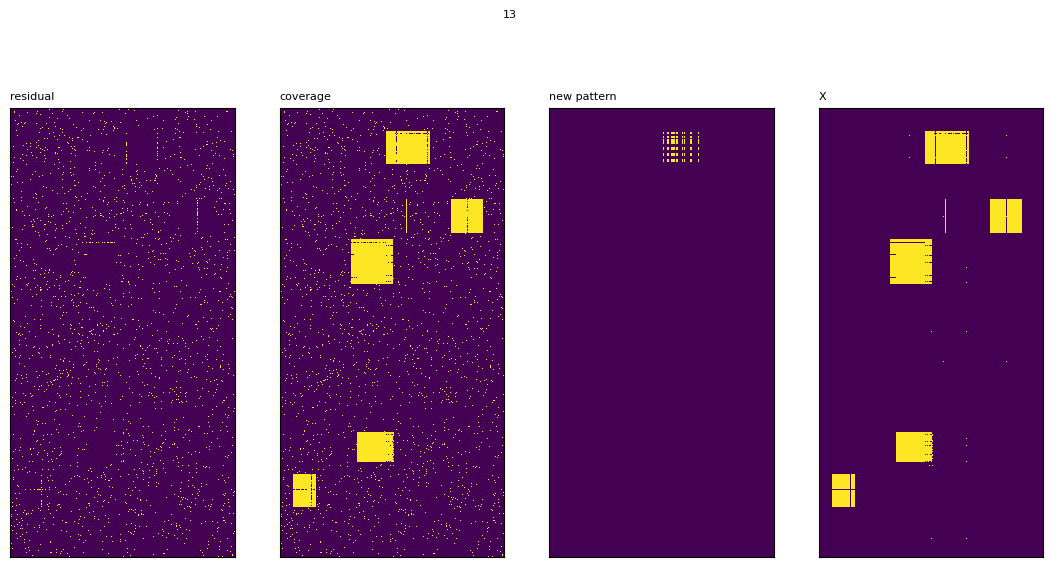

[I] 14	init cost	: 10935.0
[I] 	add col		: 10918.0 -> 10917.0 (-1.0)
[I] 14	find core	: 10917.0 (10917.0)
[I] 14	extension	: 10917.0 (10917.0)
[I] 	pattern shape	: (2, 2.0)


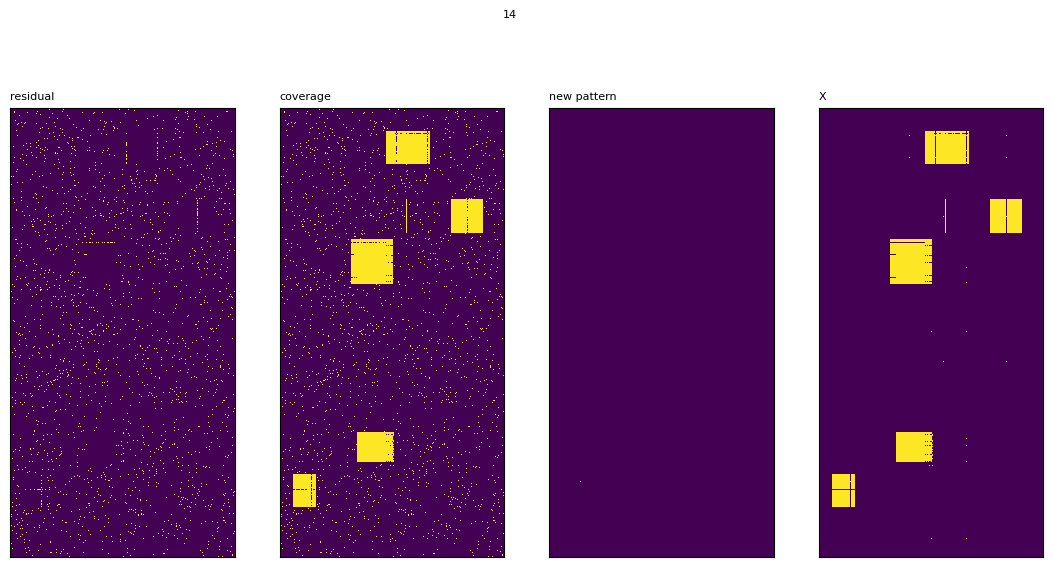

In [20]:
k = 15
rho = 1.0
w = [1, 1]

panda = Panda(k=k, rho=rho, w=w)
panda.fit(X_train, display=True, scaling=0.5, verbose=True, method='couples-frequency')

# from utils import matmul, to_dense, show_matrix
# settings = [(to_dense(X_test), [0, 0], 'X'), 
#             (matmul(panda.U, panda.V.T, sparse=False, boolean=True), [0, 1], "X'")]
# show_matrix(settings=settings, scaling=0.5)

### 3. Method 'correlation'

[I] k            : 15
[I] rho          : 1.0
[I] weights      : [1, 1]
[I] method       : frequency
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.5
[I] method       : correlation
[I] 0	init cost	: 28129.0
[I] 0	find core	: 27962.0 (27962.0)
[I] 0	extension	: 27464.0 (27464.0)
[I] 	pattern shape	: (215, 16.0)


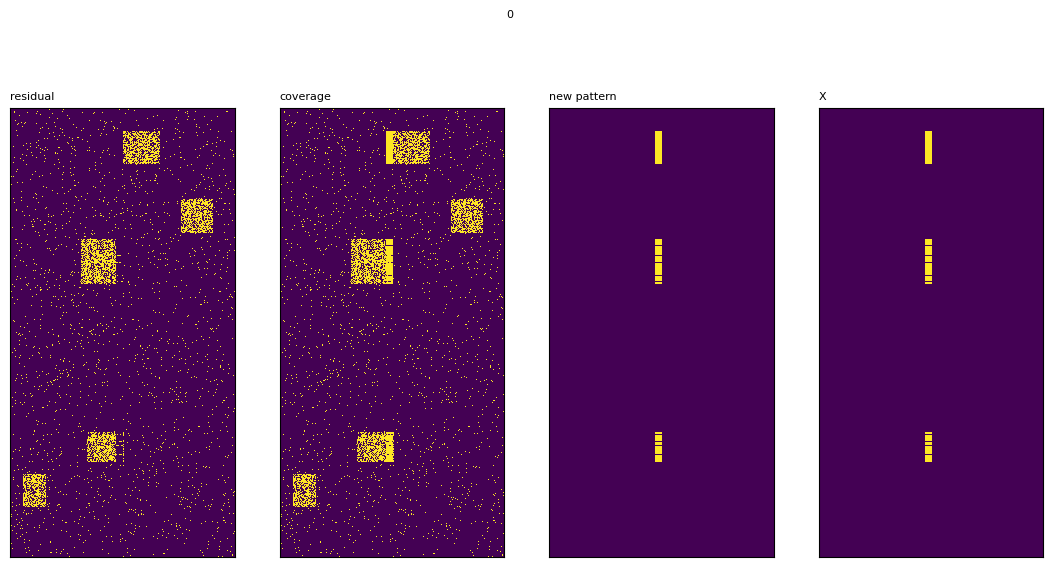

[I] 1	init cost	: 27464.0
[I] 1	find core	: 26057.0 (26057.0)
[I] 1	extension	: 24166.0 (24166.0)
[I] 	pattern shape	: (162, 67.0)


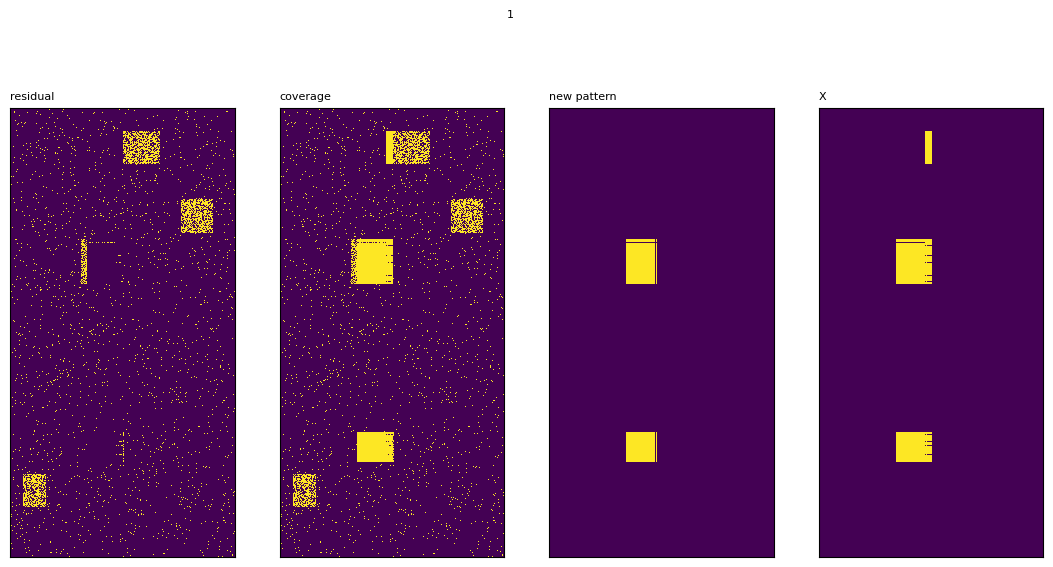

[I] 2	init cost	: 24166.0
[I] 2	find core	: 20040.0 (20040.0)
[I] 2	extension	: 19841.0 (19841.0)
[I] 	pattern shape	: (91, 47.0)


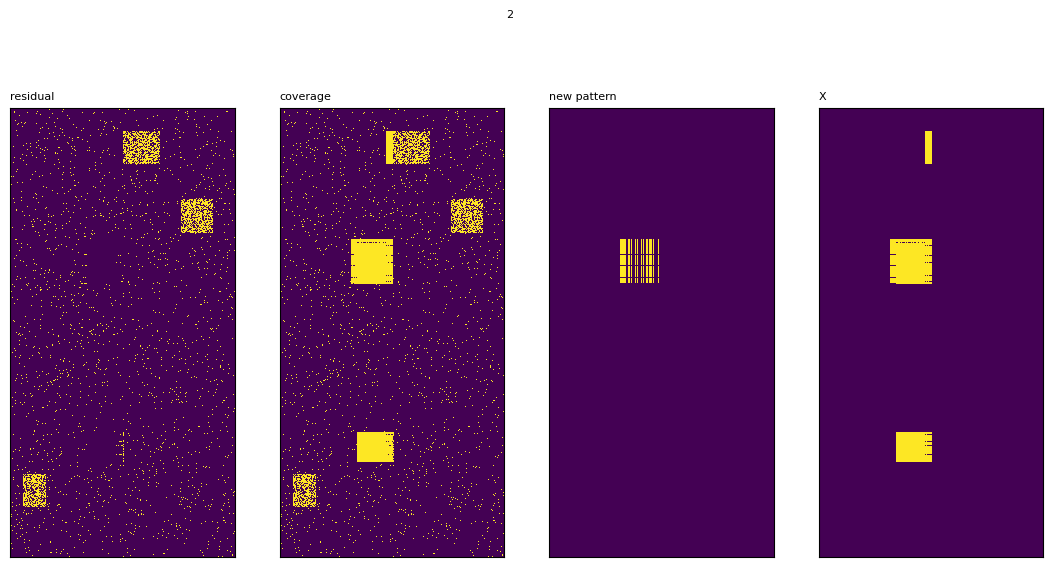

[I] 3	init cost	: 19841.0
[I] 3	find core	: 19322.0 (19322.0)
[I] 3	extension	: 19321.0 (19321.0)
[I] 	pattern shape	: (52, 5.0)


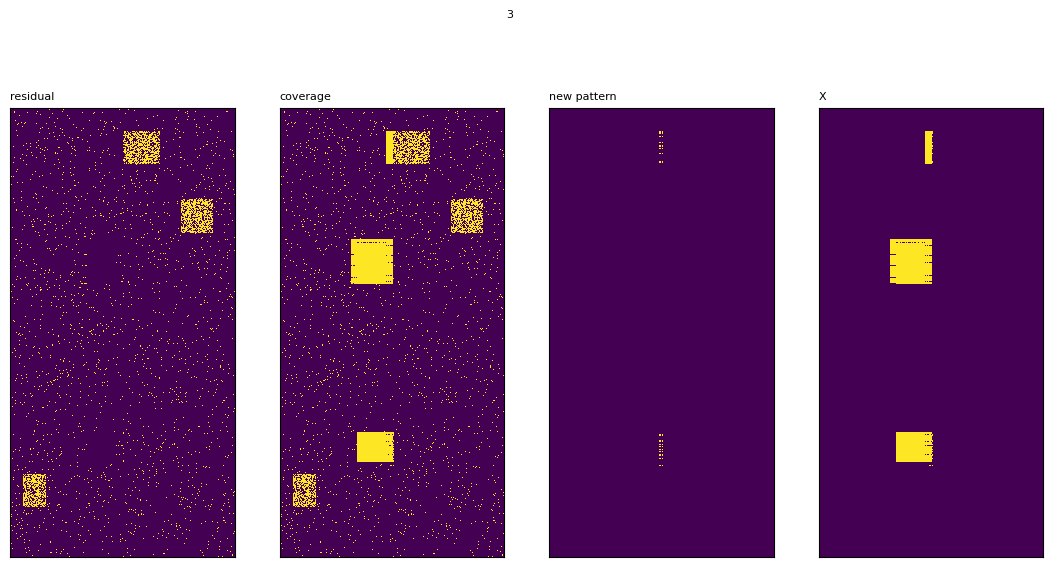

[I] 4	init cost	: 19321.0
[I] 4	find core	: 19221.0 (19221.0)
[I] 4	extension	: 18323.0 (18323.0)
[I] 	pattern shape	: (75, 69.0)


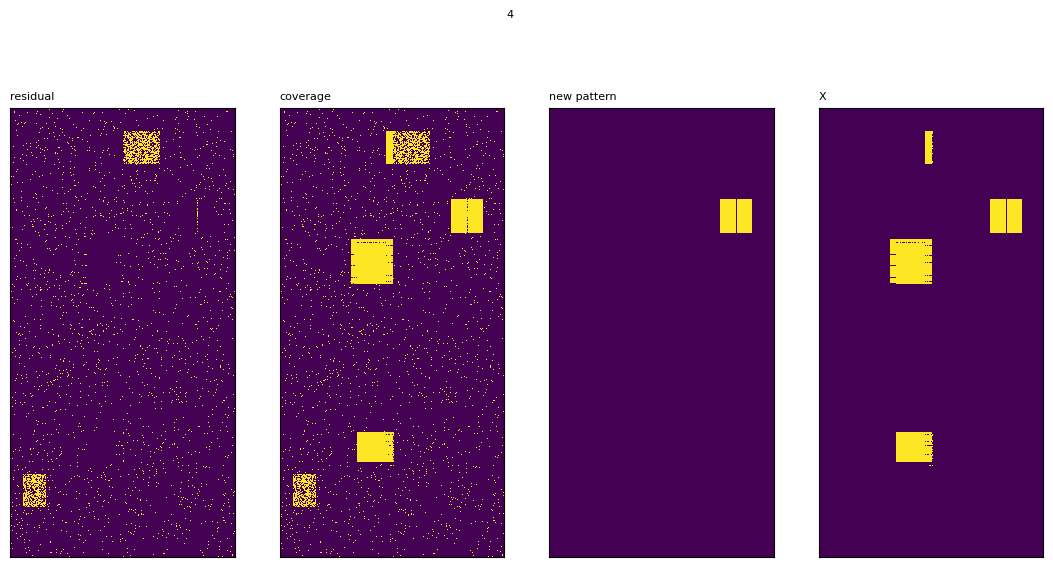

[I] 5	init cost	: 18323.0
[I] 5	find core	: 16238.0 (16238.0)
[I] 5	extension	: 15596.0 (15596.0)
[I] 	pattern shape	: (73, 50.0)


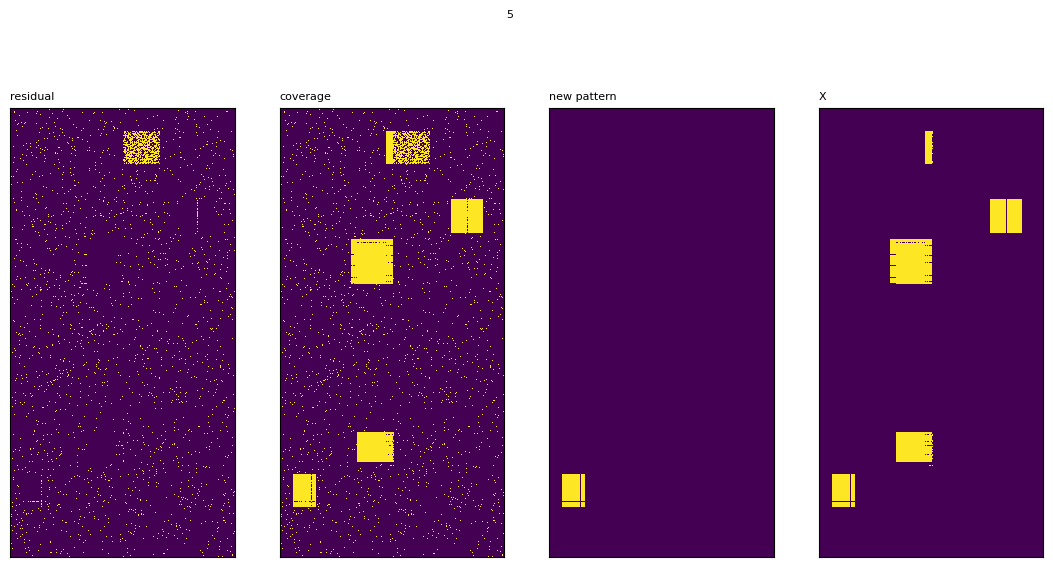

[I] 6	init cost	: 15596.0
[I] 6	find core	: 14110.0 (14110.0)
[I] 6	extension	: 13157.0 (13157.0)
[I] 	pattern shape	: (71, 79.0)


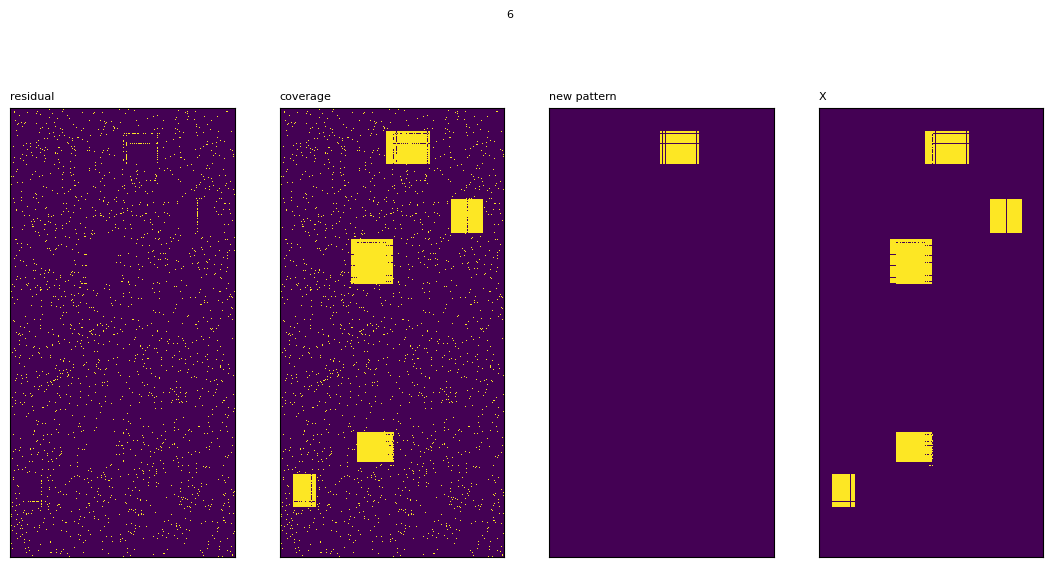

[I] 7	init cost	: 13157.0
[I] 7	find core	: 11056.0 (11056.0)
[I] 7	extension	: 11056.0 (11056.0)
[I] 	pattern shape	: (38, 36.0)


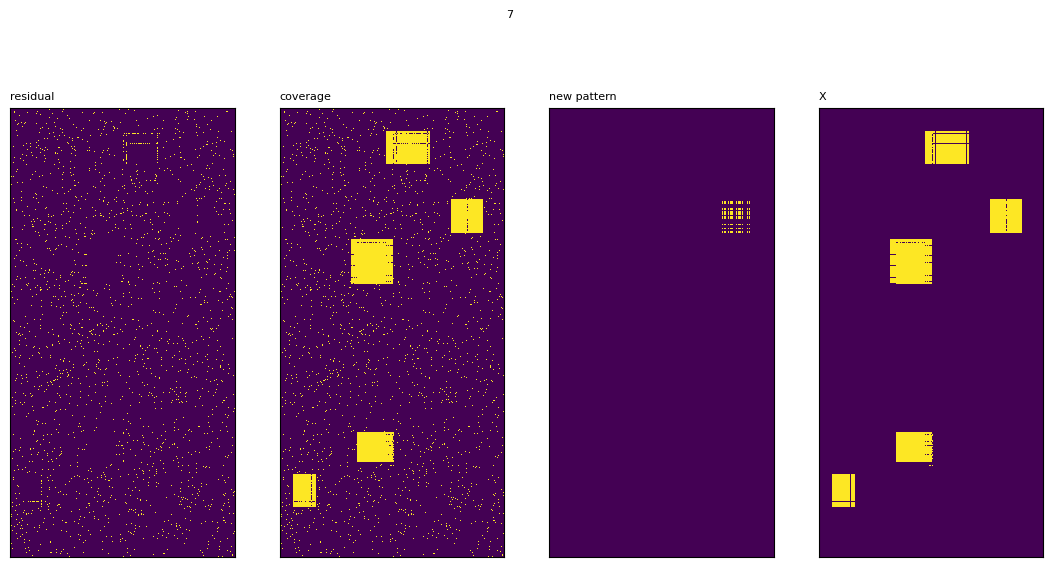

[I] 8	init cost	: 11056.0
[I] 8	find core	: 11010.0 (11010.0)
[I] 8	extension	: 10999.0 (10999.0)
[I] 	pattern shape	: (31, 17.0)


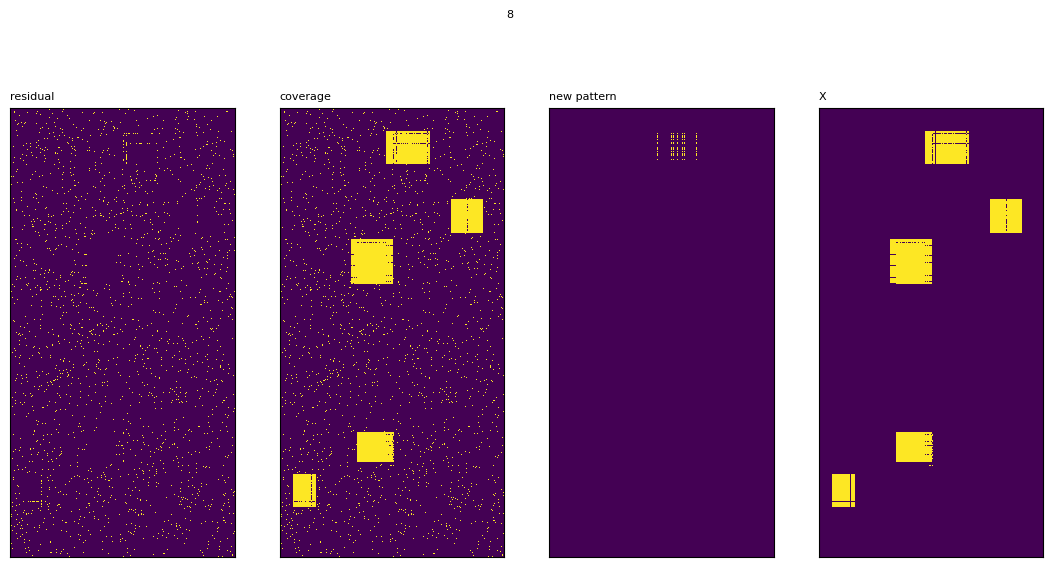

[I] 9	init cost	: 10999.0
[I] 9	find core	: 10964.0 (10964.0)
[I] 9	extension	: 10963.0 (10963.0)
[I] 	pattern shape	: (28, 4.0)


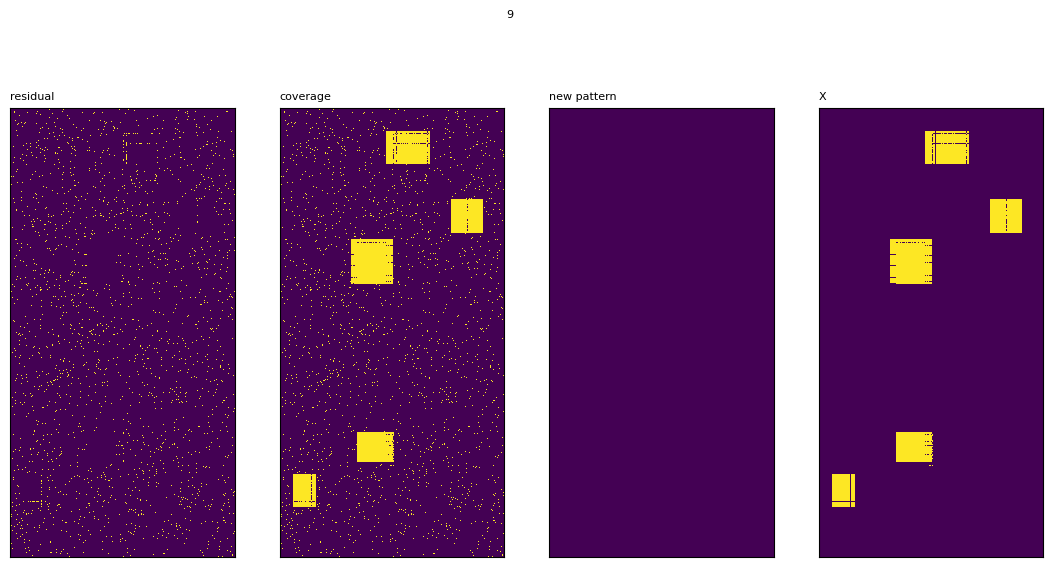

[I] 10	init cost	: 10963.0
[I] 10	find core	: 10957.0 (10957.0)
[I] 10	extension	: 10957.0 (10957.0)
[I] 	pattern shape	: (6, 2.0)


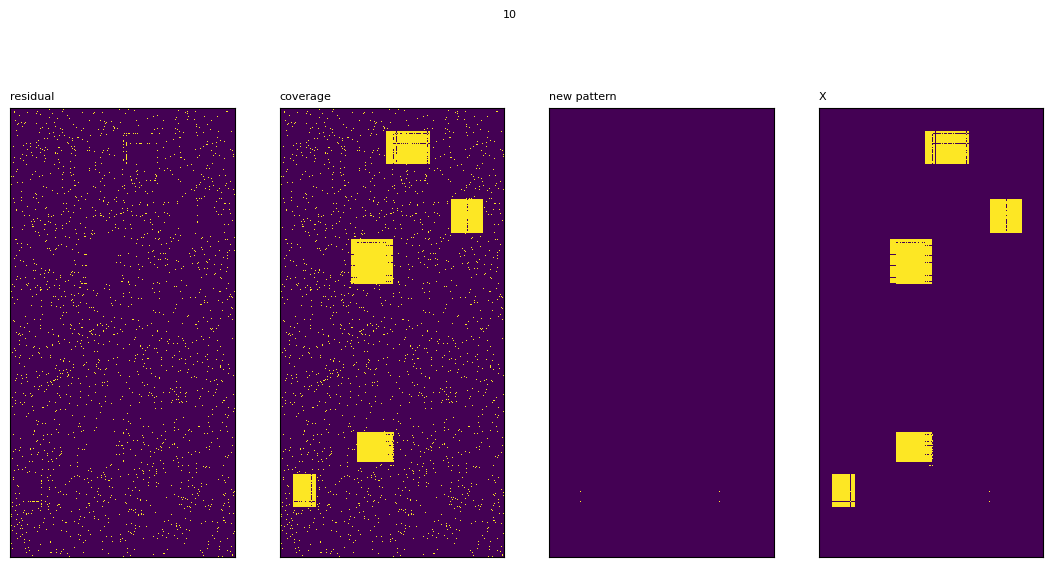

[I] 11	init cost	: 10957.0
[I] 11	find core	: 10942.0 (10942.0)
[I] 11	extension	: 10940.0 (10940.0)
[I] 	pattern shape	: (18, 5.0)


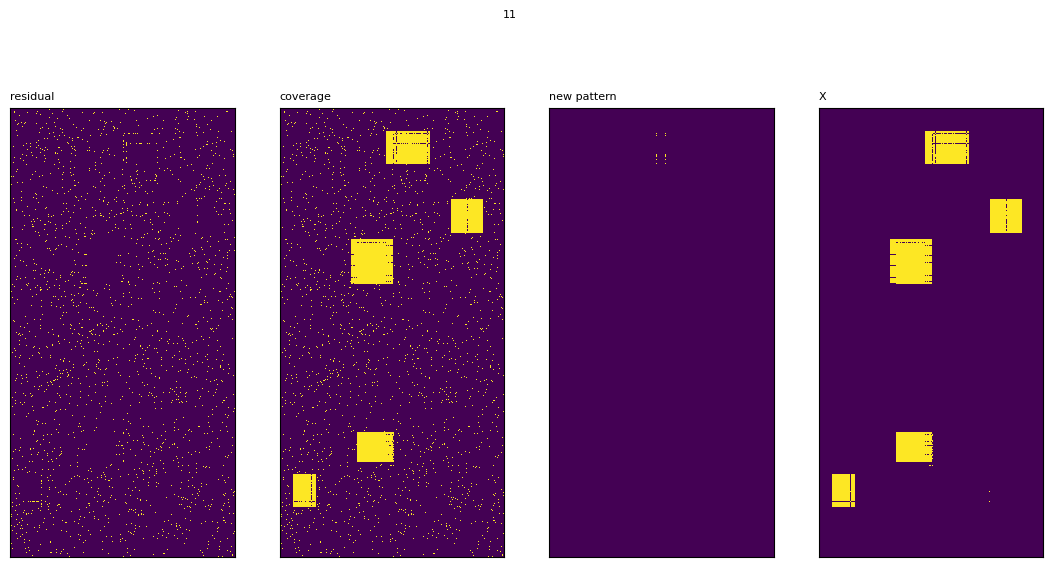

[I] 12	init cost	: 10940.0
[I] 12	find core	: 10935.0 (10935.0)
[I] 12	extension	: 10935.0 (10935.0)
[I] 	pattern shape	: (14, 5.0)


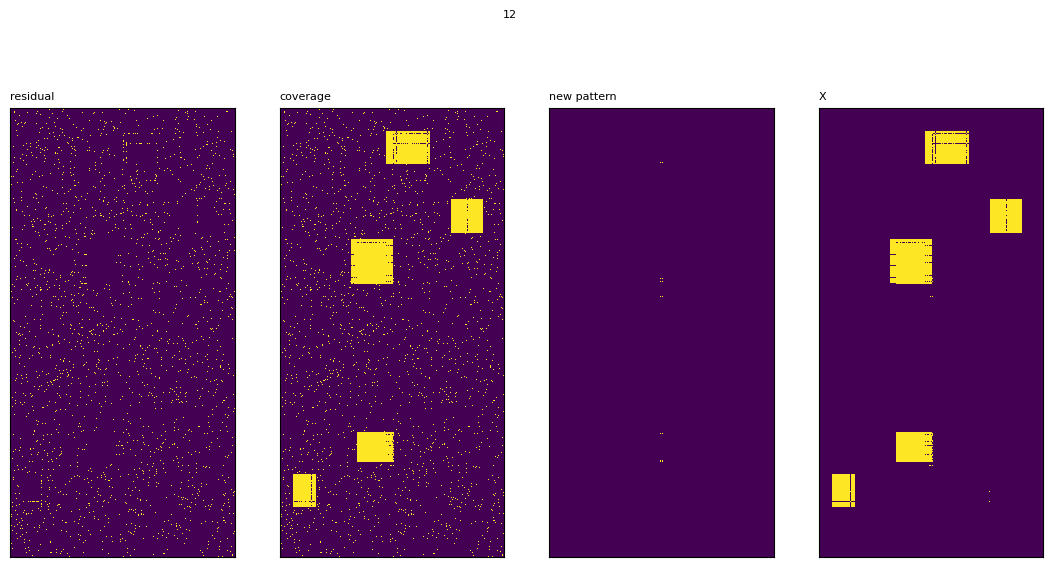

[I] 13	init cost	: 10935.0
[I] 13	find core	: 10926.0 (10926.0)
[I] 13	extension	: 10926.0 (10926.0)
[I] 	pattern shape	: (4, 2.0)


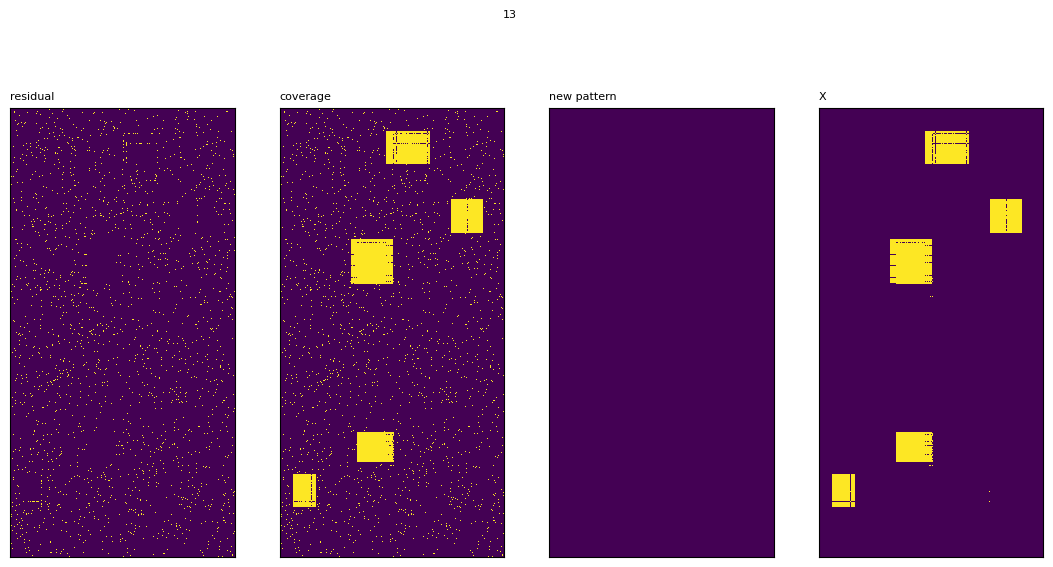

[I] 14	init cost	: 10926.0
[I] 14	find core	: 10925.0 (10925.0)
[I] 14	extension	: 10925.0 (10925.0)
[I] 	pattern shape	: (2, 3.0)


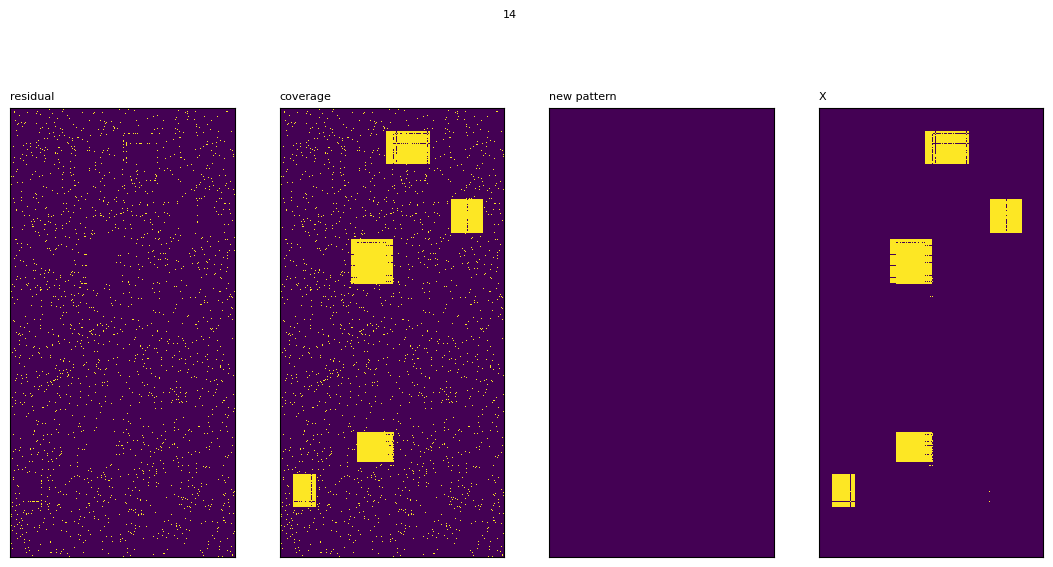

In [21]:
k = 15
rho = 1.0
w = [1, 1]

panda = Panda(k=k, rho=rho, w=w)
panda.fit(X_train, display=True, scaling=0.5, verbose=False, method='correlation')

# from utils import matmul, to_dense, show_matrix
# settings = [(to_dense(X_test), [0, 0], 'X'), 
#             (matmul(panda.U, panda.V.T, sparse=False, boolean=True), [0, 1], "X'")]
# show_matrix(settings=settings, scaling=0.5)